## Toxic Comment Classification

### EDA and Cleaning

# Project Title: Toxic Comments Classification

#### Team Members

- Rakhat Zhussupekov
- Sadat Ahmed Ameyaw
- Veselina Bulatova
- Ahastasiia Kleschevnikova

#### Project Description:
Online platforms often face challenges in maintaining respectful and productive discussions due to toxic comments, which can include threats, obscenity, insults, and identity-based hate. This project aims to build a machine learning model to identify and classify such toxic comments, helping platforms foster healthier interactions. The initiative builds upon research by the Conversation AI team at Jigsaw and Google, aiming to improve existing toxicity detection models.

**These issues often lead to such Business problems**:


- Online platforms are losing user engagement and participation due to toxic comments
- Manual moderation is expensive, slow, and inconsistent
- Platforms often resort to shutting down comments entirely, losing community interaction
- Existing models (like Perspective API) lack granular toxicity detection.  (only provides a single "toxicity" score, treating all forms of toxicity as a single category). This makes it difficult for platforms to selectively moderate different types of toxic content (e.g. allowing profanity but blocking threats) – This was said in the Kaggle description of the case.

And the fiancial impact of such problems if not solved include the following:

**Financial Impact of the Problem**
1.	Direct Costs:
o	Manual moderation staff costs
o	Lost advertising revenue from reduced user engagement
o	Platform maintenance costs for basic moderation tools
2.	Indirect Costs:
o	User churn due to toxic environment
o	Reduced content creation
o	Brand damage from toxic content
o	Legal risks from unmoderated harmful content

#### Objective:
The goal is to create a multi-label classification model capable of predicting the probability of various types of toxicity for a given comment. The model should improve upon existing tools, such as the Perspective API, by providing nuanced predictions and reducing errors.

#### Data Source:
The dataset is sourced from Wikipedia’s talk page edits and is publicly available on [Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview). It includes comments labeled for six types of toxicity:

- Toxic
- Severe toxic
- Obscene
- Threat
- Insult
- Identity hat

#### Dataset Files:

- train.csv: Contains labeled comments for training the model.
- test.csv: Unlabeled comments for testing the model predictions.
- test_labels.csv: True labels for test data (for evaluation).

#### Dataset Columns:

- id: Unique identifier for each comment.
- comment_text: Text of the comment.
- toxic, severe_toxic, obscene, threat, insult, identity_hate: Binary labels indicating the presence (1) or absence (0) of each toxicity type.

#### Scope: This project will involve:

- Exploratory Data Analysis (EDA): To understand the dataset distribution and uncover patterns in toxic comments.
- Data Preprocessing: Cleaning and preparing text data for machine learning.
- Model Development: Building and evaluating a multi-label classification model.
- Evaluation: Comparing the model's performance against existing benchmarks.



In [ ]:
pip install scikit-multilearn

In [1]:
#importing librarie
%matplotlib inline
import pandas as pd
import numpy as np
#warnings
import warnings
warnings.filterwarnings('ignore') #to ingnore the warnings in jupyter notebooks....
#visulaisation
import  seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#nlp
import nltk
from nltk.corpus import stopwords
import re  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
#pickle & joblib&tqdm
import pickle
import joblib
from tqdm import tqdm
#sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import MLkNN

# Data Augumentation



In [2]:
# Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import pickle
import joblib
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api
import random
from googletrans import Translator  # For back-translation

In [3]:
# Load data
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:

# # Identify underrepresented classes
# underrepresented_classes = ['threat', 'identity_hate', 'severe_toxic']

# # Load pre-trained word embeddings
# word_embeddings = api.load("glove-twitter-50")
# translator = Translator()

# def synonym_replacement(text, word_embeddings):
#     """Replace words with synonyms using pre-trained word embeddings."""
#     words = text.split()
#     for i, word in enumerate(words):
#         if word in word_embeddings.key_to_index:
#             most_similar_words = word_embeddings.most_similar(word, topn=5)
#             similar_word = random.choice(most_similar_words)[0]
#             words[i] = similar_word
#     return ' '.join(words)

# def back_translation(text):
#     """Augment text using back-translation."""
#     try:
#         translated = translator.translate(text, src='en', dest='fr').text
#         back_translated = translator.translate(translated, src='fr', dest='en').text
#         return back_translated
#     except Exception as e:
#         return text  # Return original text if translation fails

# def random_insertion(text):
#     """Randomly insert a word from the text back into itself."""
#     words = text.split()
#     if len(words) > 1:
#         random_word = random.choice(words)
#         insert_pos = random.randint(0, len(words))
#         words.insert(insert_pos, random_word)
#     return ' '.join(words)

# augmented_data = []
# for class_name in underrepresented_classes:
#     underrepresented_data = data[data[class_name] == 1].sample(frac=0.5)

#     for _, row in underrepresented_data.iterrows():
#         comment = row['comment_text']

#         # Apply different augmentation techniques
#         augmented_comments = [
#             synonym_replacement(comment, word_embeddings),
#             back_translation(comment),
#             random_insertion(comment)
#         ]

#         for augmented_comment in augmented_comments:
#             augmented_row = [augmented_comment] + list(row[1:])
#             augmented_data.append(augmented_row)

# # Convert augmented data to DataFrame and concatenate
# augmented_df = pd.DataFrame(augmented_data, columns=data.columns)
# data = pd.concat([data, augmented_df], ignore_index=True)

# train = data

# Load your data
data = pd.read_csv('train.csv')

# Identify underrepresented classes
underrepresented_classes = ['threat', 'identity_hate','severe_toxic']

# Load pre-trained word embeddings
word_embeddings = api.load("glove-twitter-50")

def synonym_replacement(text, word_embeddings):
    words = text.split()
    for i, word in enumerate(words):
        if word in word_embeddings.key_to_index:
            most_similar_words = word_embeddings.most_similar(word, topn=5)
            similar_word = random.choice(most_similar_words)[0]
            words[i] = similar_word
    return ' '.join(words)

# Augment the underrepresented classes
for class_name in underrepresented_classes:
    underrepresented_data = data[data[class_name] == 1].sample(frac=0.5) 
    augmented_data = []

    for _, row in underrepresented_data.iterrows():
        augmented_comment = synonym_replacement(row['comment_text'], word_embeddings)
        augmented_data.append([augmented_comment] + list(row[1:]))

    # Create a new DataFrame with the augmented data
    augmented_df = pd.DataFrame(augmented_data, columns=data.columns)

    # Concatenate the original and augmented dataframes
    data = pd.concat([data, augmented_df], ignore_index=True)


In [6]:
train = data

In [7]:
%time
test = pd.read_csv('test.csv')
test.head()

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 5.96 µs


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)


Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64


In [9]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
"""check if lables are multi-lables"""

train[train['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
161439,Fuck see I'll bitch if Muslim Turkish animal. ...,Fuck you \n\nI'll fuck you Muslim Turkish anim...,1,1,1,0,1,1
161440,it boy you're as freaking whore,your gay \n\nyou're a fucking faggot,1,1,1,0,1,1
161441,JIM WALES MUST DIE!!!!!!!!!!!! JIM WALES MUST ...,JIM WALES MUST DIE!!!!!!!!!!!! JIM WALES MUST...,1,1,0,1,0,0
161442,"WHAT THE FUCK? FUCK YOU, YOU CAN'T VANDALIZE T...","WHAT THE FUCK? \n\nFUCK YOU, YOU CAN'T VANDALI...",1,1,1,0,1,0


In [11]:
'''to describe the train data'''
word_count =train.comment_text.str.len()
word_count.describe()

count    161444.000000
mean        394.015950
std         595.719465
min           6.000000
25%          95.000000
50%         204.000000
75%         434.000000
max        5000.000000
Name: comment_text, dtype: float64

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.44 µs


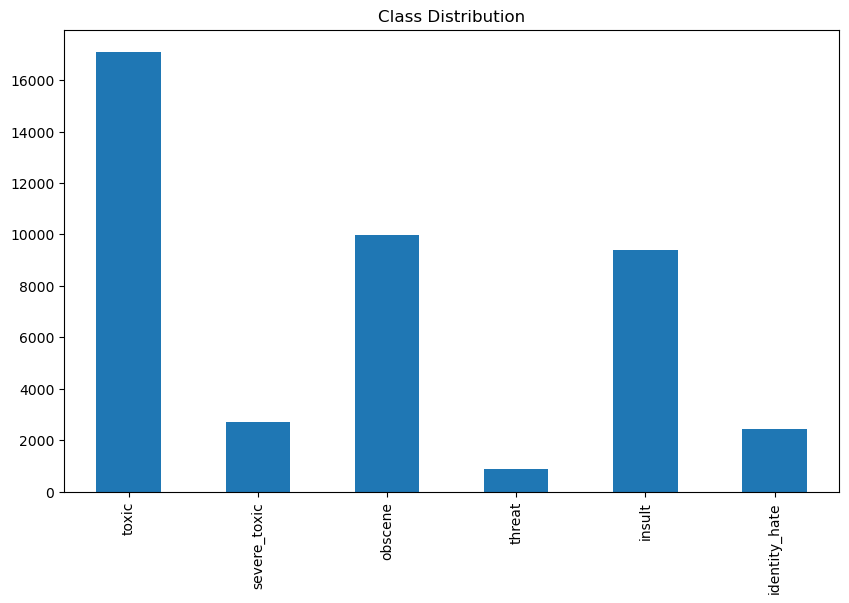

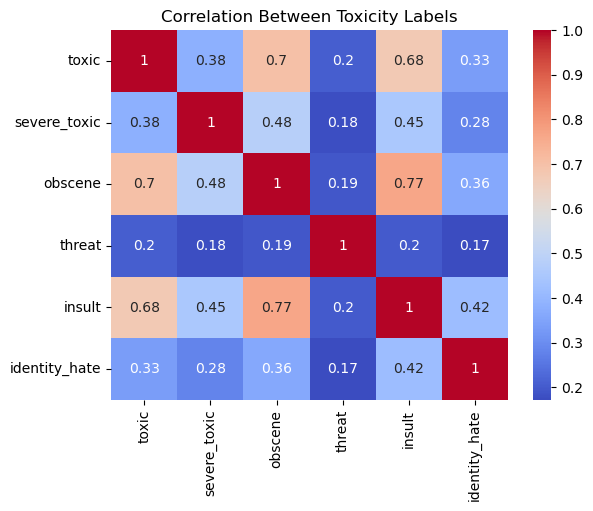

In [12]:
%time

# Class distribution
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train[cols].sum().plot(kind='bar', figsize=(10, 6), title='Class Distribution')
plt.show()


# Correlation
correlation_matrix = train[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Toxicity Labels')
plt.show()


In [13]:
count=[]
for label in tqdm(cols): 
    count.append(len(train[train[label]==1][label]))

100%|██████████| 6/6 [00:00<00:00, 524.16it/s]


In [14]:
'''to check the clean data that donot contain any toxic comment'''
train['clean']=train[cols].max(axis=1).apply(lambda x: 1 if x==0 else 0)
print(train['clean'].value_counts())

1    143346
0     18098
Name: clean, dtype: int64


In [15]:
'''to count the labels of the whole data'''
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']
data=[]
for label in tqdm(col): 
    data.append(len(train[train[label]==1][label]))

100%|██████████| 7/7 [00:00<00:00, 301.63it/s]


In [16]:
%time
# Count number of each category of comment

category_count = {col: train[col].sum() for col in cols}
print(category_count)

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 6.91 µs
{'toxic': 17098, 'severe_toxic': 2717, 'obscene': 9988, 'threat': 893, 'insult': 9412, 'identity_hate': 2441}


Class Imbalance:
The dataset is highly imbalanced with some classes (e.g., 'toxic', 'obscene', 'insult') being more prevalent, while others (e.g., 'threat', 'identity_hate') have very few instances. This could lead to biased model predictions favoring the majority classes.

Model Considerations:
Given the imbalance, We will consider techniques like class weighting, oversampling, or SMOTE (unfortunately this doesn't work for multi-lable so we won't use this) which might be necessary to improve model performance on minority classes.
We will also Consider using metrics like F1-Score, Precision, ROC-AUC and Recall over Accuracy for better performance evaluation.

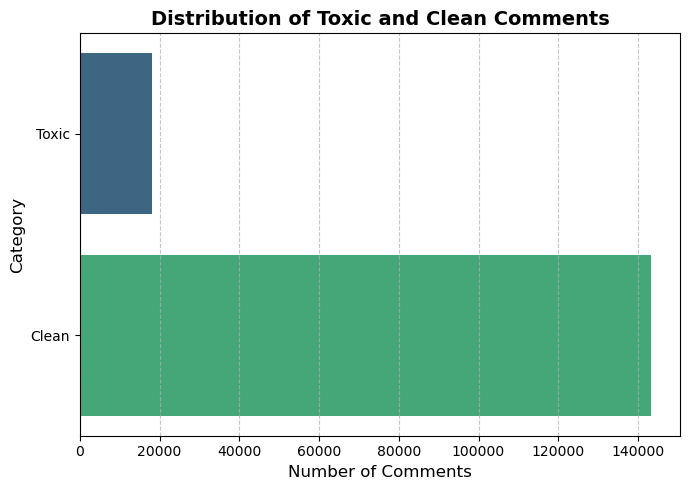

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for col in cols:
    train[col] = train[col].apply(lambda x: 1 if x > 0 else 0)


train['is_toxic'] = train[cols].sum(axis=1) > 0  # Flag toxic comments
num_toxic = train['is_toxic'].sum()  # Total toxic comments
num_clean = len(train) - num_toxic  # Total clean comments


plot_data = pd.DataFrame({
    'Category': ['Toxic', 'Clean'],
    'Count': [num_toxic, num_clean]
})


plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Distribution of Toxic and Clean Comments', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


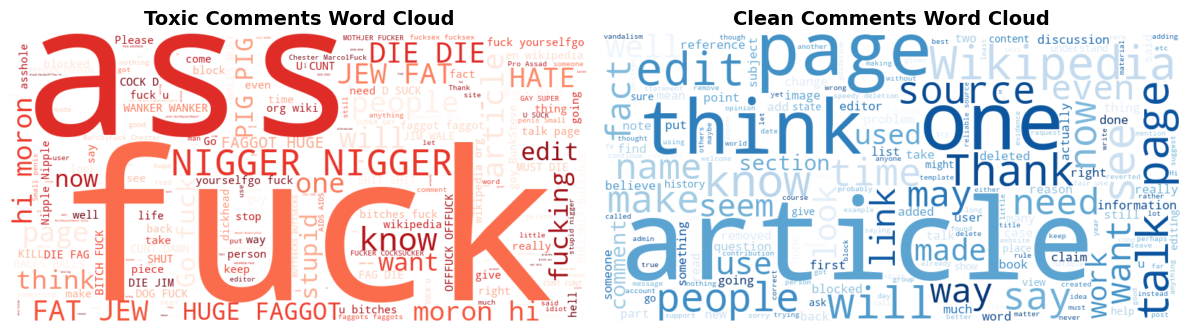

In [18]:
from wordcloud import WordCloud

# Word cloud for toxic and non toxic comments
train['is_toxic'] = train[cols].sum(axis=1) > 0


toxic_comments = train[train['is_toxic'] == 1]['comment_text']
clean_comments = train[train['is_toxic'] == 0]['comment_text']

# Combine all toxic and clean comments into one string
toxic_text = " ".join(toxic_comments)
clean_text = " ".join(clean_comments)


toxic_wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',
    max_words=200,
    contour_width=1, contour_color='black'
).generate(toxic_text)

clean_wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Blues',
    max_words=200,
    contour_width=1, contour_color='black'
).generate(clean_text)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toxic Comments Word Cloud', fontsize=14, fontweight='bold')


plt.subplot(1, 2, 2)
plt.imshow(clean_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Clean Comments Word Cloud', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

CPU times: user 1 µs, sys: 2 µs, total: 3 µs
Wall time: 6.68 µs
Multi-label comments: 11695


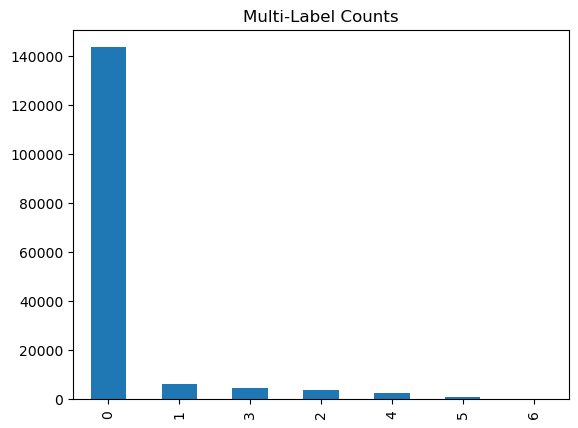

In [19]:
%time
# Multi-label comment analysis
train['Multi_label_comment'] = train[cols].sum(axis=1)
print(f"Multi-label comments: {(train['Multi_label_comment'] > 1).sum()}")
train['Multi_label_comment'].value_counts().plot(kind='bar', title="Multi-Label Counts")
plt.show()

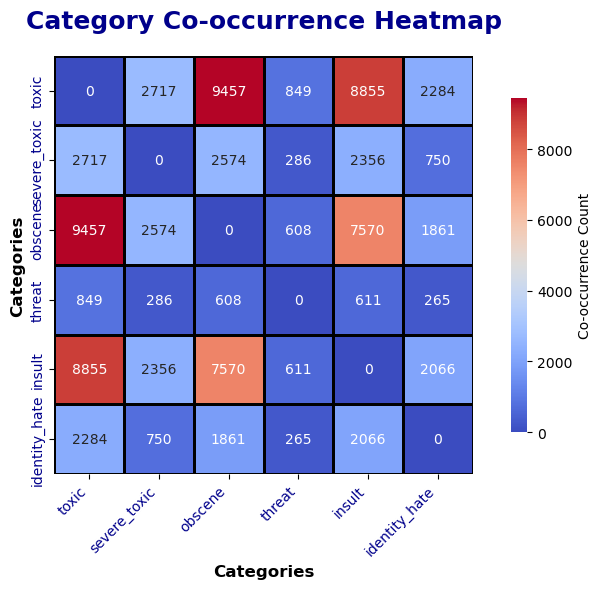

In [20]:
# co-occurrence matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


co_occurrence_matrix = train[cols].T.dot(train[cols])


np.fill_diagonal(co_occurrence_matrix.values, 0)


plt.figure(figsize=(8, 6))
sns.heatmap(
    co_occurrence_matrix,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    cbar=True,
    cbar_kws={'shrink': 0.8, 'label': 'Co-occurrence Count'},
    linewidths=1,
    linecolor='black',
    square=True
)


plt.title("Category Co-occurrence Heatmap", fontsize=18, fontweight="bold", pad=20, color="darkblue")
plt.xlabel("Categories", fontsize=12, fontweight="bold")
plt.ylabel("Categories", fontsize=12, fontweight="bold")


plt.xticks(fontsize=10, rotation=45, ha="right", color="darkblue")
plt.yticks(fontsize=10, color="darkblue")


plt.tight_layout()
plt.show()

All the analysis about multi lable and class balance will help us determine whether to build a multiclass assignment or a multilable assignment and also know what to expect.
We can see that there are some correlations between lables. Also we can see class imbalance between lables as well as also imbalance in the overall data


In [21]:
%time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# N-gram analysis to see which toxic comments always goes together
def get_top_ngrams(df, column_name, ngram_range, n=None):
    if column_name not in cols:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return

    corpus = df[df[column_name] == 1]['comment_text']
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=n).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:n]
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=["Words", "Count"])
    print(f"Top {n} {ngram_range} in {column_name}:")
    print(top_ngrams_df.head(10))

# top bi-grams and tri-grams for each category
for label in cols:
    print(f"Displaying for {cols} comments:")
    print(f"Top 10 bi-grams:")
    get_top_ngrams(train, label, ngram_range=(2, 2), n=10)
    print("-----------------------------------------------------------------------------")
    print(f"Top 10 tri-grams:")
    get_top_ngrams(train, label, ngram_range=(3, 3), n=10)
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 6.68 µs
Displaying for ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] comments:
Top 10 bi-grams:
Top 10 (2, 2) in toxic:
           Words  Count
0       fuck you   5757
1        you are   4926
2  nigger nigger   3025
3       you fuck   2956
4        ass ass   2708
5         you re   2037
6         in the   1939
7        die die   1909
8        jew fat   1855
9        fat jew   1843
-----------------------------------------------------------------------------
Top 10 tri-grams:
Top 10 (3, 3) in toxic:
                  Words  Count
0  nigger nigger nigger   3012
1         fuck you fuck   2791
2          you fuck you   2785
3           ass ass ass   2704
4           fat jew fat   1843
5           jew fat jew   1840
6           hi moron hi   1641
7        moron hi moron   1639
8           die die die   1620
9          you hate you   1429
-----------------------------------------------------------------------

In [22]:
# lets see the actual proportion of each part of the toxic comments and non toxic
toxic_count = train['is_toxic'].sum()  # Total toxic comments
clean_count = len(train) - toxic_count  # Total clean comments


print(f"Toxic Comments: {toxic_count} rows")
print(f"Clean Comments: {clean_count} rows")


Toxic Comments: 18098 rows
Clean Comments: 143346 rows


In [23]:
y_train=train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [24]:
X_train = train[['id','comment_text']]
X_train.shape

(161444, 2)

In [25]:
X_test = test
X_test.shape

(153164, 2)

In [26]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


<AxesSubplot: >

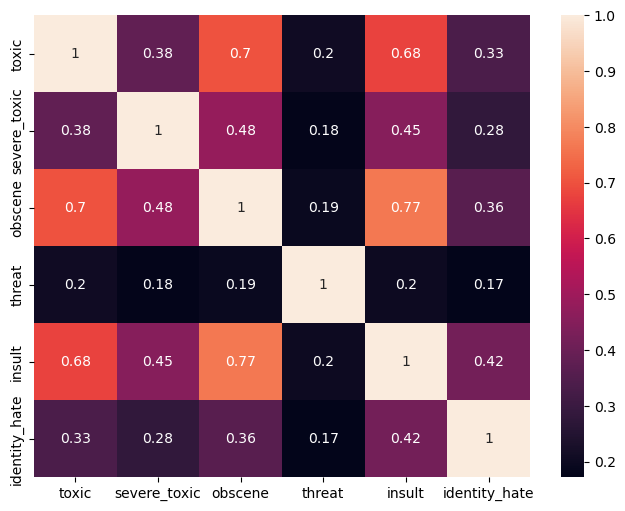

In [27]:
#correlation matrix heatmap
corr=y_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [28]:
x = y_train.sum(axis=1).value_counts()

In [29]:
'''to  check the comment having multi toxic comment'''
print("COMMENT counts having mutli labels:\n",x)

COMMENT counts having mutli labels:
 0    143346
1      6403
3      4440
2      3642
4      2632
5       872
6       109
dtype: int64


In [30]:
#convert the dataframe to numpy.ndarray()
label = y_train.to_numpy()

#### Word Clouds

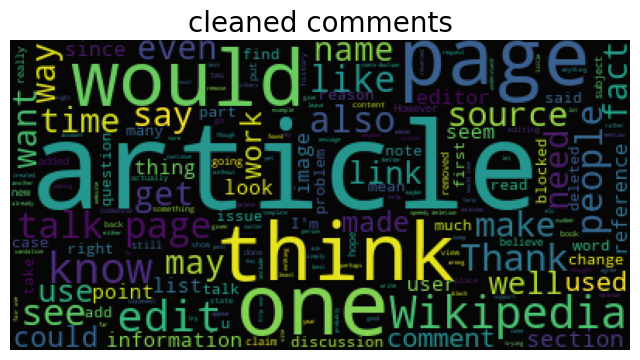

In [31]:
'''wordcloud visualisation to check the most common words in clean and toxic comments'''
#wordcloud for clean comments
stopword = set(stopwords.words("english"))
subset=train[train.clean==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=1000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(8,6))
plt.axis("off")
plt.title("cleaned comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

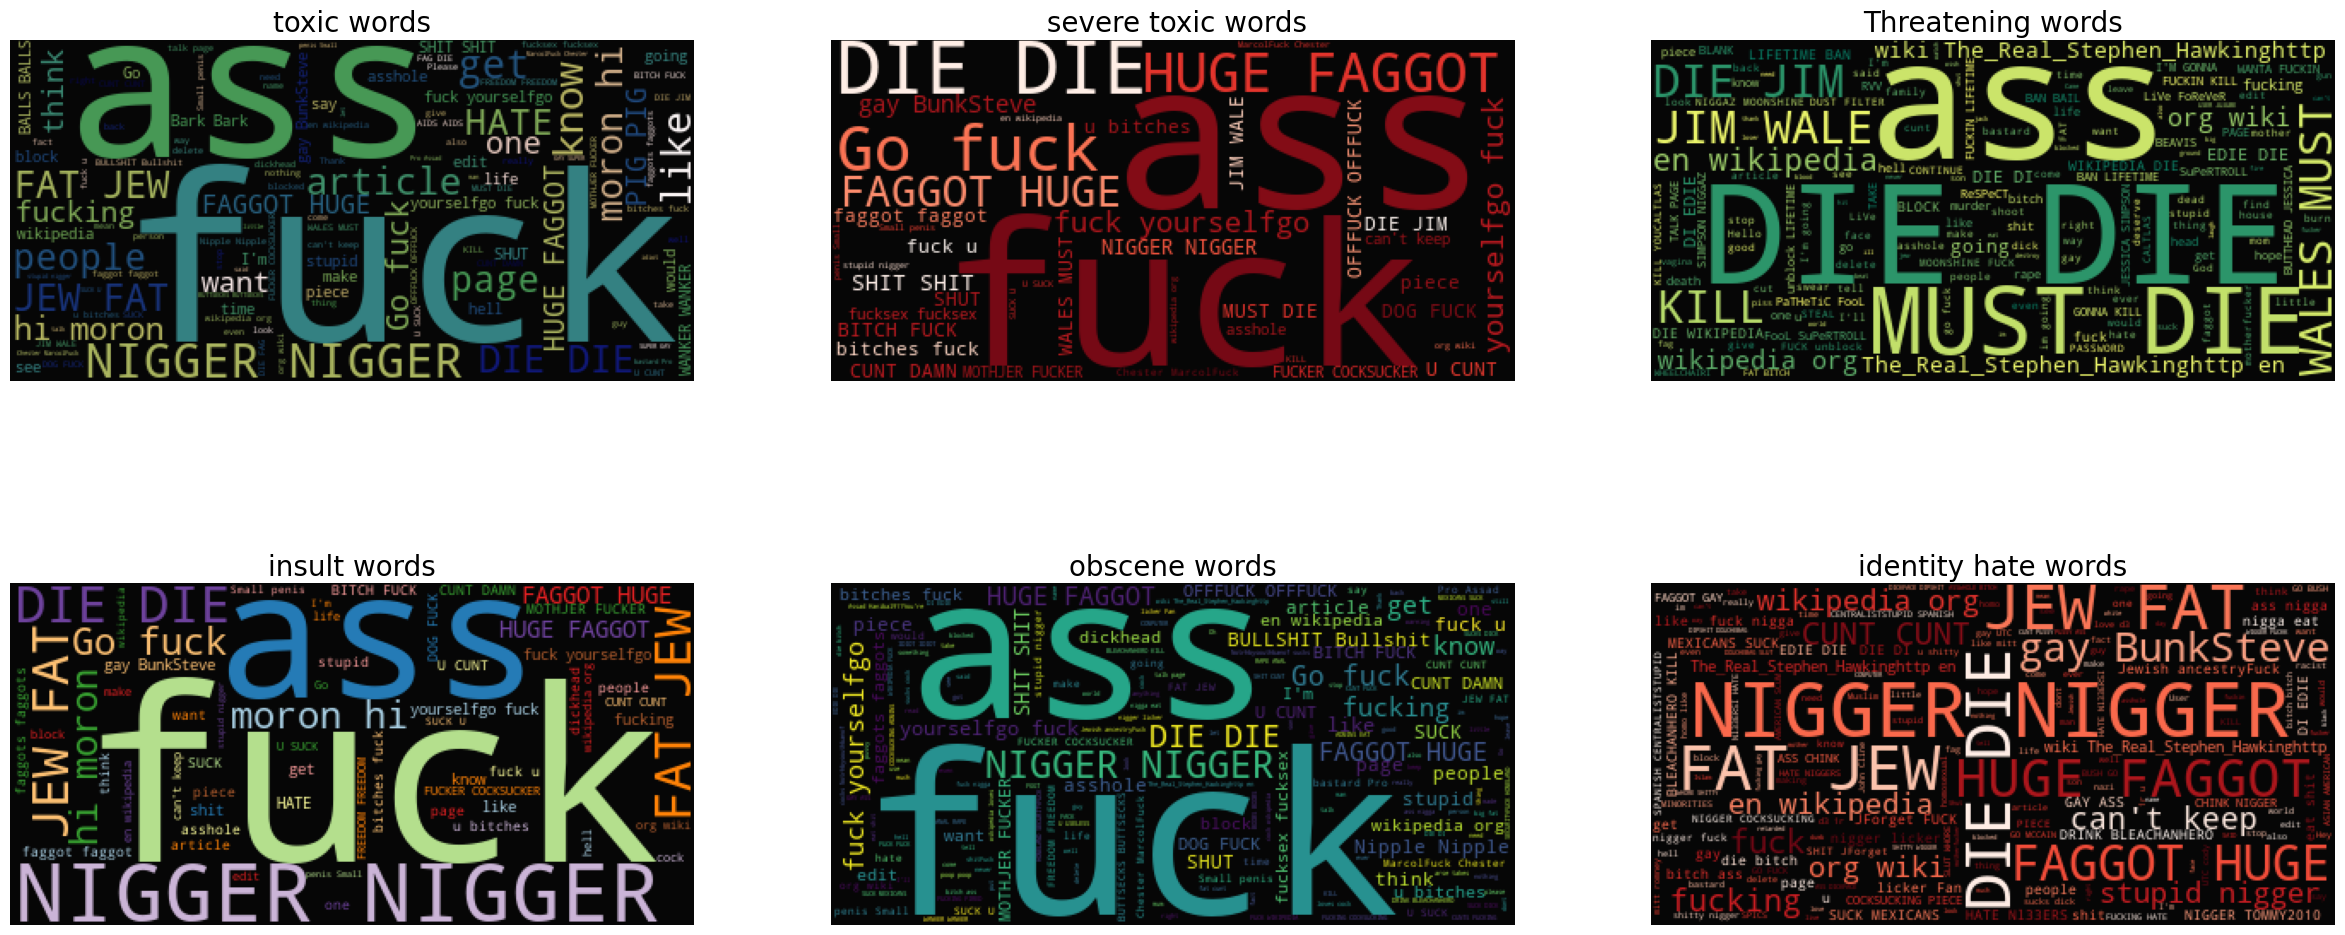

In [32]:
'''frequent words in toxic comments'''
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(30,20))
plt.subplot(331)
plt.axis("off")
plt.title("toxic words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)

'''frequent words in severe toxic comments'''
plt.subplot(332)
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title(" severe toxic words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds') ,alpha=0.98)

'''frequent words occuring in bullying comments'''
plt.subplot(333)
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Threatening words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer'), alpha=0.98)

'''frequent words occuring in insult comments'''
plt.subplot(334)
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("insult words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r'), alpha=0.98)


'''frequent words occuring in obscene comments'''
plt.subplot(335)
subset=train[train.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("obscene words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis'), alpha=0.98)

'''frequent words occuring in identity hate'''
plt.subplot(336)
subset=train[train.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.title("identity hate words", fontsize=20)
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'Reds'), alpha=0.98)
plt.show()

### Text-Cleaning

In [ ]:
# def decontracted(phrase):
#     """Expand contractions in the text."""
#     phrase = re.sub(r"won’t", "will not", phrase)
#     phrase = re.sub(r"can’t", "can not", phrase)
#     phrase = re.sub(r"n\'t", " not", phrase)
#     phrase = re.sub(r"\'re", " are", phrase)
#     phrase = re.sub(r"\'s", " is", phrase)
#     phrase = re.sub(r"\'d", " would", phrase)
#     phrase = re.sub(r"\'ll", " will", phrase)
#     phrase = re.sub(r"\'t", " not", phrase)
#     phrase = re.sub(r"\'ve", " have", phrase)
#     phrase = re.sub(r"\'m", " am", phrase)
#     return phrase

# def strip_punctuation(text):
#     """Remove punctuation and numerical values from the text."""
#     return re.sub('[^A-Za-z]+', ' ', text)

# # Text preprocessing
# def preprocess_text(data, column):
#     """Clean and preprocess text data."""
#     data[column] = data[column].apply(decontracted)
#     data[column] = data[column].apply(strip_punctuation)
#     data[column] = data[column].str.strip()

#     stop_words = set(stopwords.words('english'))
#     stop_words.discard('not')  # Keep 'not' for sentiment preservation
#     lemmatizer = WordNetLemmatizer()

#     data[column] = data[column].apply(
#         lambda x: " ".join(
#             [lemmatizer.lemmatize(word, pos='v') for word in x.split() if word not in stop_words]
#         )
#     )

#     return data

In [ ]:
# # Apply text preprocessing
# train = preprocess_text(data, 'comment_text')
# test = preprocess_text(test, 'comment_text')

# # Fill missing values
# train['comment_text'].fillna("unknown", inplace=True)
# test['comment_text'].fillna("unknown", inplace=True)

# # Final cleaned DataFrames
# X_train = train[['id', 'comment_text']].rename(columns={'comment_text': 'comments'})
# X_test = test[['id', 'comment_text']].rename(columns={'comment_text': 'comments'})
# y_train = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
# # Save cleaned DataFrames
# X_train.to_pickle('X_train.pkl')
# X_test.to_pickle('X_test.pkl')
# y_train.to_pickle('y_train.pkl')

In [33]:
# print(X_test.head())

In [34]:
'''text clening functions that replace short forms to full forms....'''
def decontracted(phrase):
# specific
    phrase = re.sub(r"won’t", "will not", phrase)
    phrase = re.sub(r"can’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [35]:
'''to remove the <.?/; and any numerical values from the text'''
def stripunc(X):
    return re.sub('[^A-Za-z]+',' ', str(X), flags=re.MULTILINE|re.DOTALL)

In [36]:
train_comm = X_train['comment_text'] #train_comm contains the comment column
test_comm = X_test['comment_text']

In [37]:
train_comm = train_comm.apply(decontracted) #cleaning functions are being applied on the text
train_comm = train_comm.apply(stripunc)

In [38]:
test_comm = test_comm.apply(decontracted) # cleaning functions applied on the test data
test_comm = test_comm.apply(stripunc)

In [39]:
train_comm = train_comm.apply(lambda x: x.strip()) # strip function has been used
test_comm = test_comm.apply(lambda x: x.strip())

In [40]:
train_comm

0         Explanation Why the edits made under my userna...
1         D aww He matches this background colour I am s...
2         Hey man I am really not trying to edit war It ...
3         More I ca not make any real suggestions on imp...
4         You sir are my hero Any chance you remember wh...
                                ...                        
161439       Fuck you I will fuck you Muslim Turkish animal
161440                    your gay you are a fucking faggot
161441    JIM WALES MUST DIE JIM WALES MUST DIE JIM WALE...
161442    WHAT THE FUCK FUCK YOU YOU CAN T VANDALIZE THE...
161443                                 Angry Fuck you bitch
Name: comment_text, Length: 161444, dtype: object

In [41]:
test_comm

0         Yo bitch Ja Rule is more succesful then you wi...
1                   From RfC The title is fine as it is IMO
2                            Sources Zawe Ashton on Lapland
3         If you have a look back at the source the info...
4                 I do not anonymously edit articles at all
                                ...                        
153159    i totally agree this stuff is nothing but too ...
153160    Throw from out field to home plate Does it get...
153161    Okinotorishima categories I see your changes a...
153162    One of the founding nations of the EU Germany ...
153163    Stop already Your bullshit is not welcome here...
Name: comment_text, Length: 153164, dtype: object

In [42]:
stop_rods = set(stopwords.words('english'))
lm= WordNetLemmatizer()

In [43]:
'''removed not and nor because someone might have used he is not a bad guy or else...so to prevent that'''
stop_rods.remove('not')

In [44]:
'''applying the lemmatization on the text and test data.'''
train_com = train_comm.apply(lambda x: " ".join([lm.lemmatize(word,pos='v') for word in x.split(" ") if word not in stop_rods]))

In [45]:
test_com = test_comm.apply(lambda x: " ".join([lm.lemmatize(word,pos='v') for word in x.split(" ") if word not in stop_rods]))

In [46]:
X_train['comments'] = train_com

In [47]:
X_test['comments'] = test_com

In [48]:
'''X_train and X_test contains two columns id and cleaned(comments)'''
X_train = X_train[['id','comments']]
X_test = X_test[['id','comments']]

In [49]:
X_train.head()

,id,comments
0,0000997932d777bf,Explanation Why edit make username Hardcore Me...
1,000103f0d9cfb60f,D aww He match background colour I seemingly s...
2,000113f07ec002fd,Hey man I really not try edit war It guy const...
3,0001b41b1c6bb37e,More I ca not make real suggestions improvemen...
4,0001d958c54c6e35,You sir hero Any chance remember page


In [50]:
X_train['comments'].fillna("unknown", inplace=True)
X_test['comments'].fillna("unknown", inplace=True)

In [51]:
'''saving the cleaned dataframes to pickl files'''
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')  # THIS IS TEST DATA FOR NOW WE CAN IGNORE THAT AND FOCUS ON X TRAIN AND Y TRAIN (Y TRAIN IS THE MULTI LABELS THAT WE NEED TO PREDICT
y_train.to_pickle('y_train.pkl')

In [52]:
'''loading the saved dataframes...'''
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [53]:
'''not used .to_csv method because it contains nan values on again reading the files...'''
# X_train=pd.read_csv('train_final.csv')
# X_test = pd.read_csv('test_final.csv')
# y_train = pd.read_csv('final_labels.csv')

'not used .to_csv method because it contains nan values on again reading the files...'

In [54]:
### We will continue the next part in a new notebook

# Feature engineering and Modeling

This part we will focus on feature engineering by getting the embeddings which will be used for the model

In [57]:
!pip install scikit-multilearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# # Importing necessary libraries
# import numpy as np
# import wandb
# %matplotlib inline
# import pandas as pd
# import numpy as np
# import warnings
# warnings.filterwarnings('ignore')  # Suppress warnings in Jupyter Notebooks
# import seaborn as sns
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# #warnings
# import warnings
# warnings.filterwarnings('ignore') #to ingnore the warnings in jupyter notebooks....
# #visulaisation
# import  seaborn as sns
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# #nlp
# import nltk
# from nltk.corpus import stopwords
# import re  
# from nltk.stem.wordnet import WordNetLemmatizer 
# from nltk.tokenize import word_tokenize
# #pickle & joblib&tqdm
# import pickle
# import joblib
# from tqdm import tqdm
# #sklearn
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import GridSearchCV
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn import metrics
# from sklearn.metrics import f1_score,precision_score,recall_score
# from sklearn.linear_model import LogisticRegression
# from skmultilearn.adapt import MLkNN
# from sklearn.model_selection import train_test_split

In [59]:
import os

os.getcwd()

'/home/jovyan/Ahmed_Industry_project_backup'

# Modeling

In [2]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score
from gensim.models import Word2Vec
import gensim.downloader as api
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

# Load Datasets
files = [
    ('X_train.pkl', 'X_train'),
    ('X_test.pkl', 'X_test'),
    ('y_train.pkl', 'y_train')
]

dataframes = {}
for file_name, var_name in tqdm(files, desc="Loading DataFrames", unit="file"):
    dataframes[var_name] = pd.read_pickle(file_name)

X_train = dataframes['X_train']
y_train = dataframes['y_train']
X_test = dataframes['X_test']

# Split the Train Data into Train and Validation Sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['comments'], y_train, test_size=0.2, random_state=42
)


print("Training Data Shape:", X_train_split.shape)
print("Validation Data Shape:", X_val_split.shape)

# Load
y_test = pd.read_csv('test_labels.csv')
scored_test_labels = y_test[(y_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] != -1).any(axis=1)]
scored_test_data = pd.merge(scored_test_labels, X_test, on='id')

X_test_aligned = scored_test_data['comments']
y_test_aligned = scored_test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

Loading DataFrames: 100%|██████████| 3/3 [00:00<00:00, 19.13file/s]


Training Data Shape: (129155,)
Validation Data Shape: (32289,)


# TF-IDF Vectorization and Logistic Regression

In [3]:

def evaluate_model(y_true, y_pred, y_probs, labels):
    """Evaluate model performance."""
    metrics = {
        "f1": f1_score(y_true, y_pred, average='weighted'),
        "roc_auc": roc_auc_score(y_true, y_probs, average='weighted', multi_class='ovr'),
    }
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=labels))
    return metrics

# TF-IDF Vectorization and Logistic Regression
print("Starting TF-IDF Experiment...")
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.9, sublinear_tf=True, max_features=1000, stop_words='english')

# Fit TF-IDF on the training data only
train_vectors = tfidf_vectorizer.fit_transform(X_train_split)
val_vectors = tfidf_vectorizer.transform(X_val_split)
test_vectors = tfidf_vectorizer.transform(X_test_aligned)




# def evaluate_model(y_true, y_pred, y_probs, labels):
#     """Evaluate model performance."""
#     metrics = {
#         "f1": f1_score(y_true, y_pred, average='weighted'),
#         "roc_auc": roc_auc_score(y_true, y_probs, average='weighted', multi_class='ovr'),
#     }
#     print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=labels))
#     return metrics

# # TF-IDF Vectorization and Logistic Regression
# print("Starting TF-IDF Experiment...")
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), min_df=3, max_df=0.9, sublinear_tf=True, max_features=1000, stop_words='english')

# # Fit TF-IDF on the training data only
# train_vectors = tfidf_vectorizer.fit_transform(X_train_split)
# val_vectors = tfidf_vectorizer.transform(X_val_split)
# test_vectors = tfidf_vectorizer.transform(X_test_aligned)

Starting TF-IDF Experiment...


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def custom_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')


scorer = make_scorer(custom_scorer)

# Parameter grid for Logistic Regression
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 50, 100],
    'estimator__penalty': ['l2'],  # Only L2
    'estimator__solver': ['saga'],  # Only saga solver
    'estimator__max_iter': [1000, 2000]  # Max iterations
}


model = OneVsRestClassifier(LogisticRegression(class_weight='balanced'))

# Total iterations for tqdm
total_iterations = 50  # `n_iter=50`
pbar = tqdm(total=total_iterations, desc="RandomizedSearch Progress", unit="iteration")

# Custom callback to update tqdm progress
class ProgressUpdateCallback:
    def __init__(self, pbar):
        self.pbar = pbar

    def on_fit(self, n_candidates, n_splits):
        self.total_iterations = n_candidates * n_splits

    def __call__(self, estimator, param_grid, splits):
        self.pbar.update(1)

callback = ProgressUpdateCallback(pbar)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=50,  # Adjust iterations
    cv=5,
    verbose=1,
    n_jobs=-1,
    refit=True
)

# Fit RandomizedSearchCV with a tqdm progress bar
try:
    random_search.fit(train_vectors, y_train_split)
finally:
    pbar.close()


best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate on validation data
val_preds = best_model.predict(val_vectors)
val_probs = best_model.predict_proba(val_vectors)
tfidf_val_metrics = evaluate_model(y_val_split, val_preds, val_probs, y_train.columns)
print("TF-IDF Validation Metrics:", tfidf_val_metrics)


RandomizedSearch Progress:   0%|          | 0/50 [00:00<?, ?iteration/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sa

Best Hyperparameters: {'estimator__solver': 'saga', 'estimator__penalty': 'l2', 'estimator__max_iter': 2000, 'estimator__C': 0.01}

Classification Report:
                precision    recall  f1-score   support

        toxic       0.56      0.77      0.65      3403
 severe_toxic       1.00      0.00      0.00       559
      obscene       0.69      0.82      0.75      2002
       threat       0.01      1.00      0.01       169
       insult       0.52      0.79      0.63      1888
identity_hate       0.16      0.65      0.26       501

    micro avg       0.14      0.74      0.24      8522
    macro avg       0.49      0.67      0.38      8522
 weighted avg       0.58      0.74      0.59      8522
  samples avg       0.05      0.08      0.06      8522

TF-IDF Validation Metrics: {'f1': 0.5914277291142805, 'roc_auc': 0.9426121728504132}



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Evaluate on test data
test_preds = random_search.predict(test_vectors)
test_probs = random_search.predict_proba(test_vectors)
tfidf_test_metrics = evaluate_model(y_test_aligned, test_preds, test_probs, y_train.columns)
print("TF-IDF Test Metrics:", tfidf_test_metrics)


Classification Report:
                precision    recall  f1-score   support

        toxic       0.42      0.78      0.54      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.46      0.80      0.58      3691
       threat       0.00      1.00      0.01       211
       insult       0.35      0.77      0.48      3427
identity_hate       0.11      0.69      0.20       712

    micro avg       0.12      0.77      0.21     14498
    macro avg       0.22      0.67      0.30     14498
 weighted avg       0.38      0.77      0.50     14498
  samples avg       0.04      0.07      0.05     14498

TF-IDF Test Metrics: {'f1': 0.49894782869717724, 'roc_auc': 0.9286437273732345}


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Extracting feature importance for Logistic Regression



Top 200 features for 'toxic':
fuck: 4.7197
stupid: 2.5724
shit: 2.5516
suck: 2.3231
ass: 2.1812
idiot: 2.1380
bitch: 1.8831
gay: 1.8576
hell: 1.7916
article: -1.7262
faggot: 1.6609
dick: 1.6604
asshole: 1.6523
talk: -1.5182
thanks: -1.4945
fucking: 1.4008
cunt: 1.3873
hate: 1.3615
life: 1.3141
stop: 1.3104
thank: -1.2772
kill: 1.2470
bullshit: 1.2337
die: 1.2278
source: -1.2226
utc: -1.1398
moron: 1.1348
nigger: 1.1332
penis: 1.1109
racist: 1.1020
cock: 1.0836
use: -1.0740
fag: 1.0730
shut: 1.0692
section: -1.0480
bastard: 1.0349
add: -0.9979
like: 0.9972
damn: 0.9849
list: -0.9728
little: 0.9697
link: -0.9405
hey: 0.9236
nazi: 0.8953
wp: -0.8953
sex: 0.8945
dont: 0.8924
fat: 0.8724
redirect: -0.8558
fucker: 0.8184
reference: -0.7932
mother: 0.7931
help: -0.7767
discussion: -0.7635
image: -0.7461
mention: -0.7459
issue: -0.7450
im: 0.7220
block edit: -0.7218
eat: 0.7079
piece: 0.7073
work: -0.6863
request: -0.6833
ban: 0.6729
man: 0.6699
people: 0.6691
troll: 0.6671
oh: 0.6653
case: -

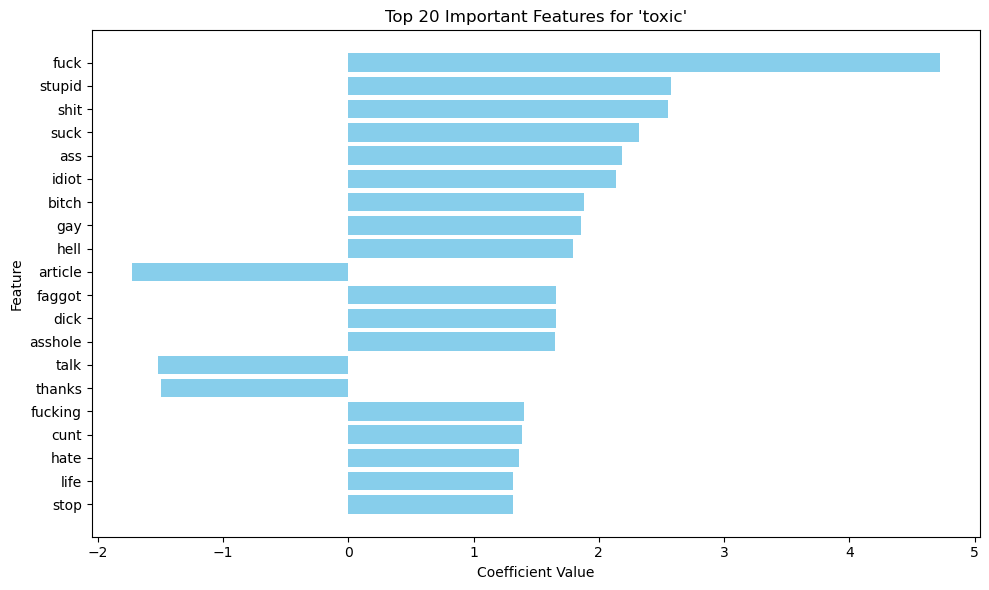

In [8]:
import matplotlib.pyplot as plt

def get_feature_importance_logreg(model, vectorizer, labels, top_n=200):
    """Get top N feature importance for logistic regression and print them."""
    # best estimator from RandomizedSearchCV
    best_model = model.best_estimator_
    importance = {}
    
    for i, label in enumerate(labels):
        coef = best_model.estimators_[i].coef_[0]
        feature_names = vectorizer.get_feature_names_out()
        #top N features based on absolute value of coefficients
        top_features = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)[:top_n]
        importance[label] = top_features
        
        # Print top N features for the current label
        print(f"\nTop {top_n} features for '{label}':")
        for feature, weight in top_features:
            print(f"{feature}: {weight:.4f}")
            
    return importance

def plot_feature_importance(importance, label, top_n=20):
    """Plot feature importance for a given label."""
    # Extract top N features and their coefficients
    features, coefficients = zip(*importance[label][:top_n])
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(features, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Important Features for '{label}'")
    plt.gca().invert_yaxis()  # Invert y-axis to show top features at the top
    plt.tight_layout()
    plt.show()

# top 200 important features for all labels and print them
try:
    tfidf_importance = get_feature_importance_logreg(random_search, tfidf_vectorizer, y_train.columns, top_n=200)
    
    # Plot for a specific label (e.g., "toxic")
    plot_feature_importance(tfidf_importance, "toxic", top_n=20)
except Exception as e:
    print(f"Error while extracting or plotting feature importance: {e}")


# Word2Vec embeddings with Logregressor

In [15]:
# Word2Vec Embeddings with Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, make_scorer


def custom_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

scorer = make_scorer(custom_scorer)

print("Starting Word2Vec Experiment...")


w2v_model = Word2Vec(
    sentences=[comment.split() for comment in tqdm(X_train_split, desc="Training Word2Vec", unit="comment")], 
    vector_size=100, 
    window=5, 
    min_count=5, 
    workers=8
)

def vectorize_with_word2vec(comments, w2v_model):
    """Vectorize text data using Word2Vec embeddings."""
    vectorized_comments = []
    for comment in tqdm(comments, desc="Vectorizing Comments", unit="comment"):
        words = comment.split()
        word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
        if word_vectors:
            vectorized_comments.append(np.mean(word_vectors, axis=0))
        else:
            vectorized_comments.append(np.zeros(w2v_model.vector_size))
    return np.array(vectorized_comments)

# Vectorize train, validation, and test data
train_w2v = vectorize_with_word2vec(X_train_split, w2v_model)
val_w2v = vectorize_with_word2vec(X_val_split, w2v_model)
test_w2v = vectorize_with_word2vec(X_test_aligned, w2v_model)


model = OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=1000))

# Randomized search hyperparameter grid
param_distributions = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['saga']
}

# Randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    scoring=scorer,
    n_iter=5,
    cv=3,     
    verbose=1,
    n_jobs=-1
)


random_search.fit(train_w2v, y_train_split)


best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate on validation data
val_preds = best_model.predict(val_w2v)
val_probs = best_model.predict_proba(val_w2v)
w2v_val_metrics = evaluate_model(y_val_split, val_preds, val_probs, y_train.columns)
print("Word2Vec Validation Metrics:", w2v_val_metrics)

# Evaluate on test data
test_preds = best_model.predict(test_w2v)
test_probs = best_model.predict_proba(test_w2v)
w2v_test_metrics = evaluate_model(y_test_aligned, test_preds, test_probs, y_train.columns)
print("Word2Vec Test Metrics:", w2v_test_metrics)

Starting Word2Vec Experiment...


Vectorizing Comments: 100%|██████████| 63978/63978 [00:04<00:00, 12827.75comment/s]

Fitting 3 folds for each of 5 candidates, totalling 15 fits



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which

Best Hyperparameters: {'estimator__solver': 'saga', 'estimator__C': 0.1}


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                precision    recall  f1-score   support

        toxic       0.51      0.86      0.64      3403
 severe_toxic       0.22      0.94      0.36       559
      obscene       0.42      0.87      0.57      2002
       threat       0.08      0.69      0.14       169
       insult       0.39      0.88      0.54      1888
identity_hate       0.12      0.89      0.21       501

    micro avg       0.34      0.87      0.49      8522
    macro avg       0.29      0.86      0.41      8522
 weighted avg       0.41      0.87      0.55      8522
  samples avg       0.05      0.09      0.06      8522

Word2Vec Validation Metrics: {'f1': 0.546129864314691, 'roc_auc': 0.9564535681411837}

Classification Report:
                precision    recall  f1-score   support

        toxic       0.37      0.85      0.52      6090
 severe_toxic       0.06      0.93      0.10       367
      obscene       0.30      0.85      0.44      3691
       threat       0.04      0.74 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
test_preds

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0]])


Top 20 important embedding dimensions for 'toxic':
Dimension 78: 1.3469
Dimension 49: 1.0603
Dimension 71: -1.0496
Dimension 32: -1.0292
Dimension 92: 1.0281
Dimension 50: 1.0141
Dimension 2: 0.9547
Dimension 83: 0.8729
Dimension 48: -0.8408
Dimension 55: 0.8091
Dimension 56: -0.7613
Dimension 88: 0.7453
Dimension 87: -0.6994
Dimension 0: -0.6903
Dimension 1: 0.6550
Dimension 67: 0.6451
Dimension 23: -0.6440
Dimension 80: -0.6250
Dimension 19: -0.6178
Dimension 24: 0.5976

Top 20 important embedding dimensions for 'severe_toxic':
Dimension 78: 1.5280
Dimension 98: 1.2268
Dimension 92: 1.1764
Dimension 68: -0.9717
Dimension 14: -0.9306
Dimension 2: 0.8799
Dimension 32: -0.8519
Dimension 49: 0.8511
Dimension 8: -0.8038
Dimension 75: 0.7350
Dimension 67: 0.6959
Dimension 95: -0.6943
Dimension 24: 0.6859
Dimension 0: -0.6690
Dimension 51: 0.6689
Dimension 50: 0.6680
Dimension 22: 0.6675
Dimension 11: -0.6381
Dimension 87: -0.6228
Dimension 56: -0.5942

Top 20 important embedding dimension

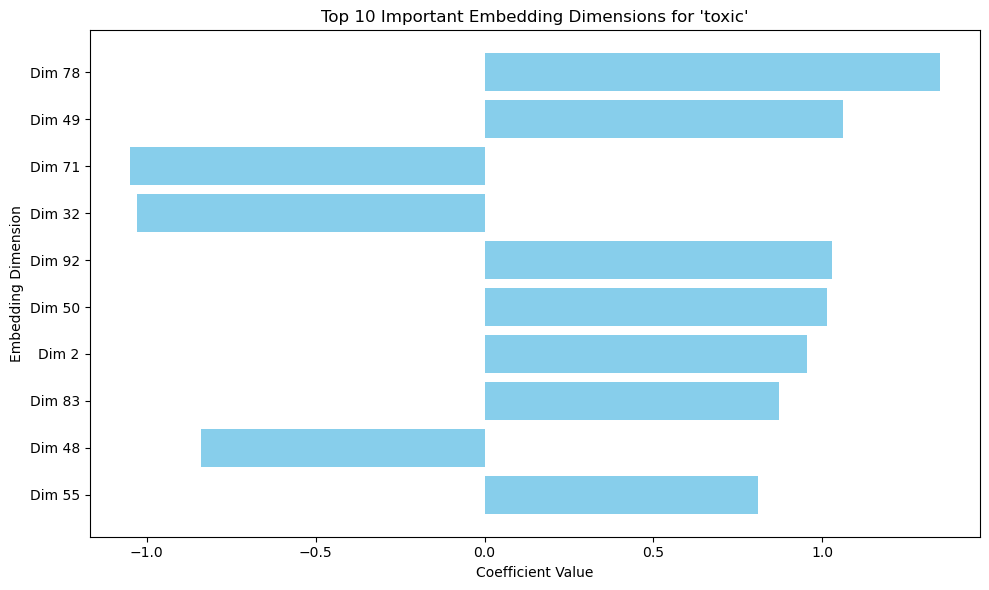

In [17]:
def get_embedding_importance_logreg(model, labels, top_n=20):
    """Get top N feature importance for logistic regression with Word2Vec embeddings."""
    best_model = model.best_estimator_
    importance = {}

    for i, label in enumerate(labels):
        coef = best_model.estimators_[i].coef_[0]
        # the top N dimensions based on absolute value of coefficients
        top_dimensions = sorted(enumerate(coef), key=lambda x: abs(x[1]), reverse=True)[:top_n]
        importance[label] = top_dimensions

        # Print top dimensions for the current label
        print(f"\nTop {top_n} important embedding dimensions for '{label}':")
        for dim, weight in top_dimensions:
            print(f"Dimension {dim}: {weight:.4f}")

    return importance

def plot_embedding_importance(importance, label, top_n=20):
    """Plot embedding importance for a given label."""
    top_dimensions = importance[label][:top_n]
    dimensions, coefficients = zip(*top_dimensions)
    dimensions = [f"Dim {dim}" for dim in dimensions]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(dimensions, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Embedding Dimension")
    plt.title(f"Top {top_n} Important Embedding Dimensions for '{label}'")
    plt.gca().invert_yaxis()  # Invert y-axis to show top dimensions at the top
    plt.tight_layout()
    plt.show()

#  top 20 important embedding dimensions for all labels
try:
    embedding_importance = get_embedding_importance_logreg(random_search, y_train.columns, top_n=20)

    # Plot for a specific label (e.g., "toxic")
    plot_embedding_importance(embedding_importance, "toxic", top_n=10)
except Exception as e:
    print(f"Error while extracting or plotting embedding importance: {e}")


In [ ]:
pip install shap lime

In [ ]:
import shap
explainer = shap.KernelExplainer(model.predict_proba, X_test_sample)
shap_values = explainer.shap_values(X_test_sample[0])
shap.summary_plot(shap_values, X_test_sample)


# Glove with Logregression

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from gensim.models import Word2Vec
import gensim.downloader as api


# GloVe Embeddings with Randomized Search and Subsampling
print("Starting GloVe Experiment with Subsampling...")


glove_model = api.load("glove-twitter-200")

def vectorize_with_glove(comments, glove_model):
    """Vectorize text data using GloVe embeddings."""
    vectorized_comments = []
    for comment in tqdm(comments, desc="Vectorizing Comments", unit="comment"):
        words = comment.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if word_vectors:
            vectorized_comments.append(np.mean(word_vectors, axis=0))
        else:
            vectorized_comments.append(np.zeros(glove_model.vector_size))
    return np.array(vectorized_comments)

# Subsample the data
subsample_size = int(0.2 * len(X_train_split))  # Use 20% of the data
X_train_subsample, _, y_train_subsample, _ = train_test_split(
    X_train_split, y_train_split, train_size=subsample_size, random_state=42
)

# Vectorize the subsampled data
train_glove_subsample = vectorize_with_glove(X_train_subsample, glove_model)
val_glove = vectorize_with_glove(X_val_split, glove_model)  # Use full validation set
test_glove = vectorize_with_glove(X_test_aligned, glove_model) # Use full test set

# model and parameter grid for Randomized Search
model = OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=2000))

param_distributions = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],  
    'estimator__solver': ['saga'],             
    'estimator__penalty': ['l1', 'l2'],    
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    scoring=scorer,
    n_iter=20, 
    cv=3, 
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model on GloVe vectorized subsampled training data
random_search.fit(train_glove_subsample, y_train_subsample)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate on validation data
val_preds = best_model.predict(val_glove)
val_probs = best_model.predict_proba(val_glove)
glove_val_metrics = evaluate_model(y_val_split, val_preds, val_probs, y_train.columns)
print("GloVe Validation Metrics:", glove_val_metrics)

# Evaluate on test data
test_preds = best_model.predict(test_glove)
test_probs = best_model.predict_proba(test_glove)
glove_test_metrics = evaluate_model(y_test_aligned, test_preds, test_probs, y_train.columns)
print("GloVe Test Metrics:", glove_test_metrics)








# # GloVe Embeddings with Randomized Search
# print("Starting GloVe Experiment...")

# # Load GloVe Model
# glove_model = api.load("glove-twitter-200")

# def vectorize_with_glove(comments, glove_model):
#     """Vectorize text data using GloVe embeddings."""
#     vectorized_comments = []
#     for comment in tqdm(comments, desc="Vectorizing Comments", unit="comment"):
#         words = comment.split()
#         word_vectors = [glove_model[word] for word in words if word in glove_model]
#         if word_vectors:
#             vectorized_comments.append(np.mean(word_vectors, axis=0))
#         else:
#             vectorized_comments.append(np.zeros(glove_model.vector_size))
#     return np.array(vectorized_comments)

# # Vectorize train, validation, and test data
# train_glove = vectorize_with_glove(X_train_split, glove_model)
# val_glove = vectorize_with_glove(X_val_split, glove_model)
# test_glove = vectorize_with_glove(X_test_aligned, glove_model)

# # Define model and parameter grid for Randomized Search
# model = OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=2000))

# param_distributions = {
#     'estimator__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'estimator__solver': ['saga'],           # Solver for large datasets
#     'estimator__penalty': ['l1', 'l2'],      # Regularization penalty
# }

# random_search = RandomizedSearchCV(
#     model,
#     param_distributions=param_distributions,
#     scoring=scorer,
#     n_iter=20,  # Number of random samples
#     cv=3,       # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit model on GloVe vectorized training data
# random_search.fit(train_glove, y_train_split)

# # Best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# print("Best Hyperparameters:", best_params)

# # Evaluate on validation data
# val_preds = best_model.predict(val_glove)
# val_probs = best_model.predict_proba(val_glove)
# glove_val_metrics = evaluate_model(y_val_split, val_preds, val_probs, y_train.columns)
# print("GloVe Validation Metrics:", glove_val_metrics)

# # Evaluate on test data
# test_preds = best_model.predict(test_glove)
# test_probs = best_model.predict_proba(test_glove)
# glove_test_metrics = evaluate_model(y_test_aligned, test_preds, test_probs, y_train.columns)
# print("GloVe Test Metrics:", glove_test_metrics)

Starting GloVe Experiment with Subsampling...


Vectorizing Comments: 100%|██████████| 63978/63978 [00:04<00:00, 13419.63comment/s]


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sa

Best Hyperparameters: {'estimator__solver': 'saga', 'estimator__penalty': 'l2', 'estimator__C': 0.1}


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                precision    recall  f1-score   support

        toxic       0.45      0.84      0.59      3403
 severe_toxic       0.20      0.52      0.29       559
      obscene       0.36      0.87      0.51      2002
       threat       0.04      0.87      0.07       169
       insult       0.34      0.87      0.48      1888
identity_hate       0.09      0.21      0.13       501

    micro avg       0.30      0.79      0.44      8522
    macro avg       0.25      0.69      0.35      8522
 weighted avg       0.36      0.79      0.49      8522
  samples avg       0.06      0.08      0.07      8522

GloVe Validation Metrics: {'f1': 0.48915845475716424, 'roc_auc': 0.9372974017893949}

Classification Report:
                precision    recall  f1-score   support

        toxic       0.31      0.87      0.46      6090
 severe_toxic       0.04      0.51      0.08       367
      obscene       0.23      0.85      0.36      3691
       threat       0.02      0.92  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary of logreg base models

In [75]:
import pandas as pd

# Data for the models
data = [
    {
        "Model": "Logistic Regression",
        "Vectorizer": "TF-IDF (1,2-grams)",
        "Validation F1": 0.5914,
        "Validation ROC-AUC": 0.9426,
        "Test F1": 0.4989,
        "Test ROC-AUC": 0.9286,
        "Best Hyperparameters": {
            "C": 0.01,
            "penalty": "l2",
            "solver": "saga",
            "max_iter": 2000
        }
    },
    {
        "Model": "Logistic Regression",
        "Vectorizer": "Word2Vec (Pretrained)",
        "Validation F1": 0.5461,
        "Validation ROC-AUC": 0.9564,
        "Test F1": 0.4335,
        "Test ROC-AUC": 0.9314,
        "Best Hyperparameters": {
            "C": 0.1,
            "solver": "saga"
        }
    },
    {
        "Model": "Logistic Regression",
        "Vectorizer": "GloVe (Pretrained)",
        "Validation F1": 0.4892,
        "Validation ROC-AUC": 0.9373,
        "Test F1": 0.3733,
        "Test ROC-AUC": 0.9089,
        "Best Hyperparameters": {
            "C": 0.1,
            "penalty": "l2",
            "solver": "saga"
        }
    }
]

# Create a DataFrame
summary_df = pd.DataFrame(data)

# Format the hyperparameters as strings for better readability
summary_df["Best Hyperparameters"] = summary_df["Best Hyperparameters"].apply(lambda x: ', '.join(f'{k}={v}' for k, v in x.items()))

# Display the table
summary_df


,Model,Vectorizer,Validation F1,Validation ROC-AUC,Test F1,Test ROC-AUC,Best Hyperparameters
0,Logistic Regression,"TF-IDF (1,2-grams)",0.5914,0.9426,0.4989,0.9286,"C=0.01, penalty=l2, solver=saga, max_iter=2000"
1,Logistic Regression,Word2Vec (Pretrained),0.5461,0.9564,0.4335,0.9314,"C=0.1, solver=saga"
2,Logistic Regression,GloVe (Pretrained),0.4892,0.9373,0.3733,0.9089,"C=0.1, penalty=l2, solver=saga"


# Different models and Vectorizers ( 'XGBoost', 'LightGBM', 'CatBoost', 'SGDClassifier')

#### XGBOOST Model Variants

In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from gensim.downloader import load
from tqdm import tqdm

# Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 1), min_df=3, max_df=0.9)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def generate_word2vec(X_train, X_test, model):
    def get_average_vector(texts):
        return np.array([
            np.mean([model[word] for word in text.split() if word in model] or [np.zeros(model.vector_size)], axis=0)
            for text in texts
        ])
    return get_average_vector(X_train), get_average_vector(X_test)

def generate_glove(X_train, X_test):
    glove = load('glove-twitter-200')
    return generate_word2vec(X_train, X_test, glove)

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    y_val_pred_proba = model.predict_proba(X_val)
    y_test_pred_proba = model.predict_proba(X_test)

    # Convert to NumPy arrays for reshaping
    y_val_array = y_val.values if isinstance(y_val, pd.DataFrame) else y_val
    y_test_array = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

    # Reshape probabilities for multi-label ROC AUC calculation
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    val_roc_auc = (
        roc_auc_score(
            y_val_array.flatten(),
            np.vstack([proba[:, 1] for proba in y_val_pred_proba]).flatten(),
            average='weighted',
            multi_class='ovr',
        )
        if y_val_pred_proba is not None
        else None
    )

    test_roc_auc = (
        roc_auc_score(
            y_test_array.flatten(),
            np.vstack([proba[:, 1] for proba in y_test_pred_proba]).flatten(),
            average='weighted',
            multi_class='ovr',
        )
        if y_test_pred_proba is not None
        else None
    )

    return val_f1, val_roc_auc, test_f1, test_roc_auc


## Base XGBOOST

In [27]:
# XGBoost with TF-IDF
print("Running XGBoost with TF-IDF...")
X_train_tfidf, X_val_tfidf = generate_tfidf(X_train_split, X_val_split)
_, X_test_tfidf = generate_tfidf(X_train_split, X_test_aligned)

xgb_tfidf = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    xgb_tfidf, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")


Running XGBoost with TF-IDF...


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:09:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:10:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:10:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Validation F1-Weighted: 0.7351472663244178, Validation ROC-AUC: 0.5093479435780609
Test F1-Weighted: 0.6252274680135197, Test ROC-AUC: 0.49922269769228556


# Another tuning of XGboost (Didn't get better like the one below)

In [65]:
!pip install shap


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [76]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Binarizer
from xgboost import XGBClassifier
from scipy.stats import uniform
from gensim.downloader import load
from tqdm import tqdm
from skmultilearn.model_selection import IterativeStratification
import matplotlib.pyplot as plt
import shap

# Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(
        max_features=20000, stop_words='english', ngram_range=(1, 3), min_df=3, max_df=0.9
    )
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf, tfidf

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, threshold=0.5):
    model.fit(X_train, y_train)
    y_val_pred_proba = model.predict_proba(X_val)
    y_test_pred_proba = model.predict_proba(X_test)

    # Apply threshold per label for imbalance adjustment
    binarizer = Binarizer(threshold=threshold)
    y_val_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_val_pred_proba]).T)
    y_test_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_test_pred_proba]).T)

    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    val_roc_auc = roc_auc_score(y_val, np.vstack([proba[:, 1] for proba in y_val_pred_proba]).T, average='weighted')
    test_roc_auc = roc_auc_score(y_test, np.vstack([proba[:, 1] for proba in y_test_pred_proba]).T, average='weighted')

    return val_f1, val_roc_auc, test_f1, test_roc_auc

In [77]:
# Randomized Search for XGBoost
def run_random_search(X_train, y_train):
    print("Running XGBoost with RandomizedSearchCV...")
    xgb = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        tree_method='hist',  # Specify tree method for better performance on large datasets
        objective='binary:logistic'
    )

    param_grid = {
        'estimator__n_estimators': [100, 300],
        'estimator__max_depth': [4, 6],
        'estimator__learning_rate': [0.1, 0.2],
        'estimator__subsample': [0.8],
        'estimator__colsample_bytree': [0.8],
        'estimator__scale_pos_weight': uniform(0.01, 10),
    }

    random_search = RandomizedSearchCV(
        MultiOutputClassifier(xgb),
        param_grid,
        scoring='f1_weighted',
        cv=IterativeStratification(n_splits=3),
        verbose=2,
        n_jobs=-1,
        n_iter=8
    )
    random_search.fit(X_train, y_train)
    print(f"Best Parameters: {random_search.best_params_}")
    return random_search.best_estimator_

# Plot feature importance
def plot_feature_importance(model, tfidf_vectorizer, top_n=20):
    feature_names = tfidf_vectorizer.get_feature_names_out()

    for i, estimator in enumerate(model.estimators_):
        importance = estimator.feature_importances_
        sorted_idx = np.argsort(importance)[::-1][:top_n]
        top_features = [feature_names[j] for j in sorted_idx]
        top_importance = importance[sorted_idx]

        plt.figure(figsize=(10, 6))
        plt.barh(top_features, top_importance, color='skyblue')
        plt.title(f"Top {top_n} Features for Label {i}")
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# Extract top keywords for each label
def extract_top_keywords(tfidf, model, top_n=10):
    feature_names = tfidf.get_feature_names_out()
    class_keywords = {}

    for i, estimator in enumerate(model.estimators_):
        importance = estimator.feature_importances_
        sorted_idx = np.argsort(importance)[::-1][:top_n]
        class_keywords[f"Label {i}"] = [feature_names[j] for j in sorted_idx]

    return class_keywords

# SHAP analysis
def perform_shap_analysis(model, X_train, X_val, tfidf_vectorizer):
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_val)

    # Visualize SHAP values for a single instance
    shap.plots.waterfall(shap_values[0])

    # Summary plot for all data
    shap.summary_plot(shap_values, X_val, feature_names=tfidf_vectorizer.get_feature_names_out())

In [78]:
# Main Execution
# Assuming X_train_split, X_val_split, X_test_aligned, y_train_split, y_val_split, y_test_aligned are defined
X_train_tfidf, X_val_tfidf, tfidf = generate_tfidf(X_train_split, X_val_split)
_, X_test_tfidf, _ = generate_tfidf(X_train_split, X_test_aligned)

# Run Randomized Search and evaluate model
best_xgb = run_random_search(X_train_tfidf, y_train_split)
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    best_xgb, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)
print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running XGBoost with RandomizedSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=2.371283881119206, estimator__subsample=0.8; total time= 2.5min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=9.748690402093354, estimator__subsample=0.8; total time=15.3min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:19:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=9.726299695120034, estimator__subsample=0.8; total time= 6.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=9.417950210686097, estimator__subsample=0.8; total time= 8.1min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=2.252194937254637, estimator__subsample=0.8; total time= 4.5min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=7.4576711202969825, estimator__subsample=0.8; total time= 5.4min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estima

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:22:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:22:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=2.371283881119206, estimator__subsample=0.8; total time= 2.5min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=9.748690402093354, estimator__subsample=0.8; total time=15.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=2.252194937254637, estimator__subsample=0.8; total time= 4.5min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:25:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:28:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=7.4576711202969825, estimator__subsample=0.8; total time= 5.4min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=9.417950210686097, estimator__subsample=0.8; total time= 8.1min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=8.176824509570599, estimator__subsample=0.8; total time=14.6min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=2.371283881119206, estimator__subsample=0.8; total time= 2.5min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estima

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:29:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'estimator__colsample_bytree': 0.8, 'estimator__learning_rate': 0.1, 'estimator__max_depth': 6, 'estimator__n_estimators': 300, 'estimator__scale_pos_weight': 8.176824509570599, 'estimator__subsample': 0.8}


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:30:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:32:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:34:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Validation F1-Weighted: 0.7522487288369395, Validation ROC-AUC: 0.9684038347473636
Test F1-Weighted: 0.5836217714146893, Test ROC-AUC: 0.9552344608170793


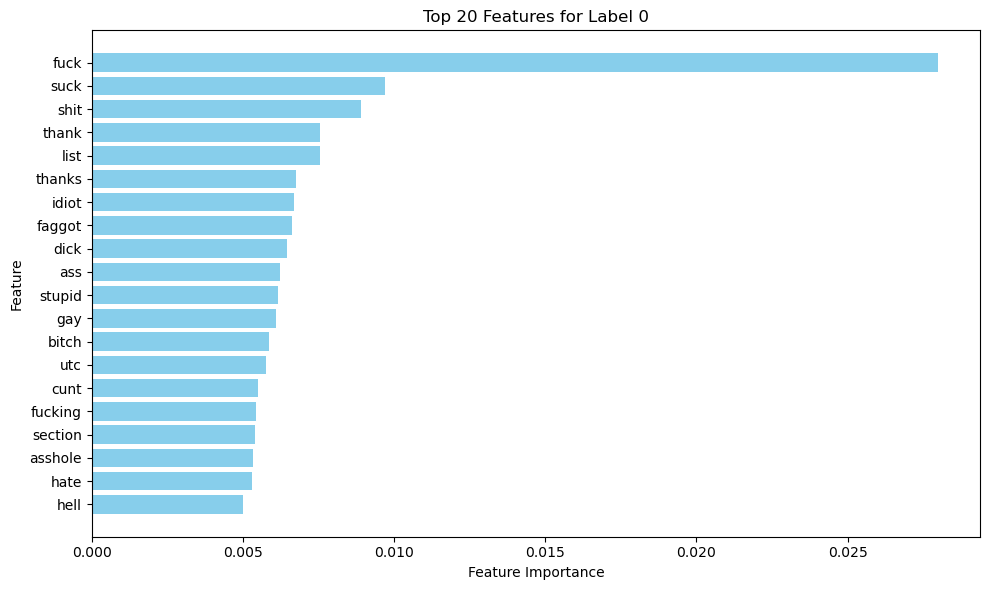

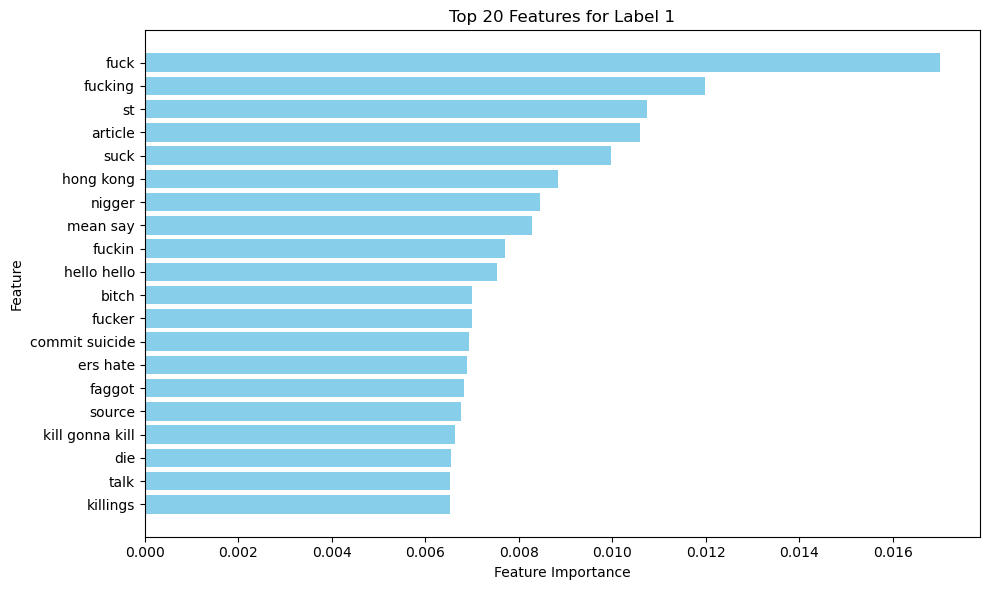

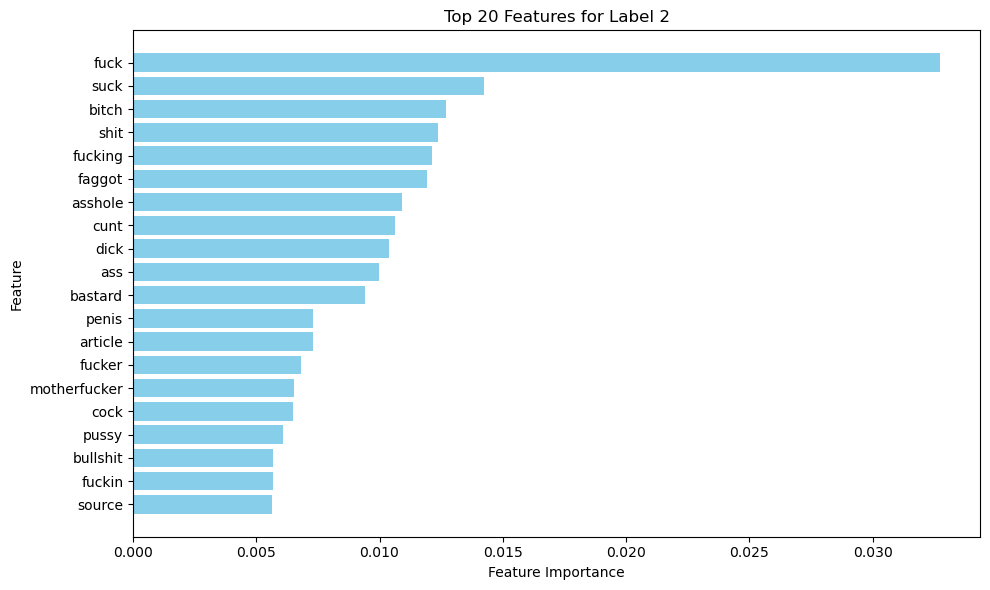

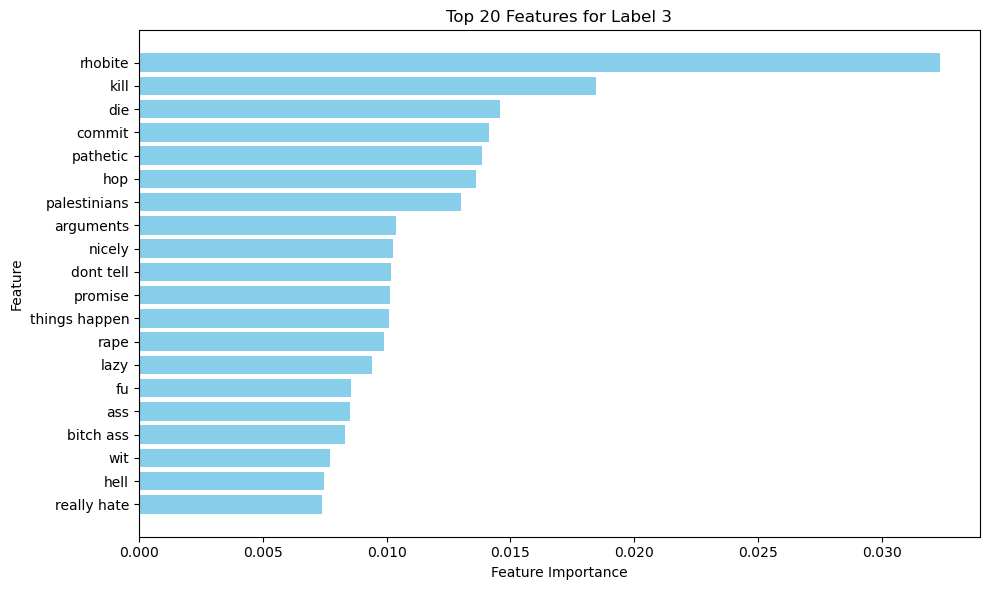

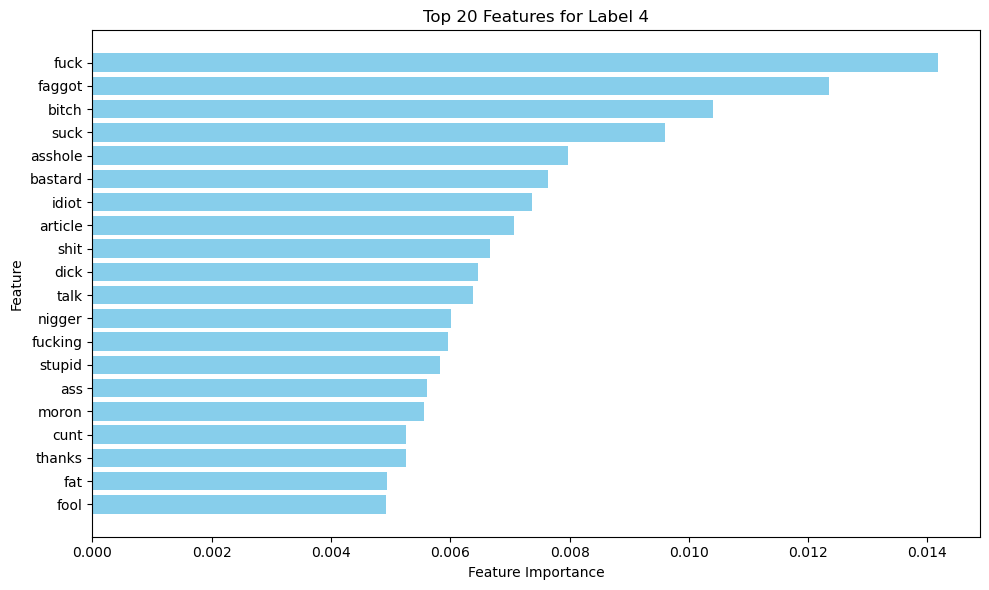

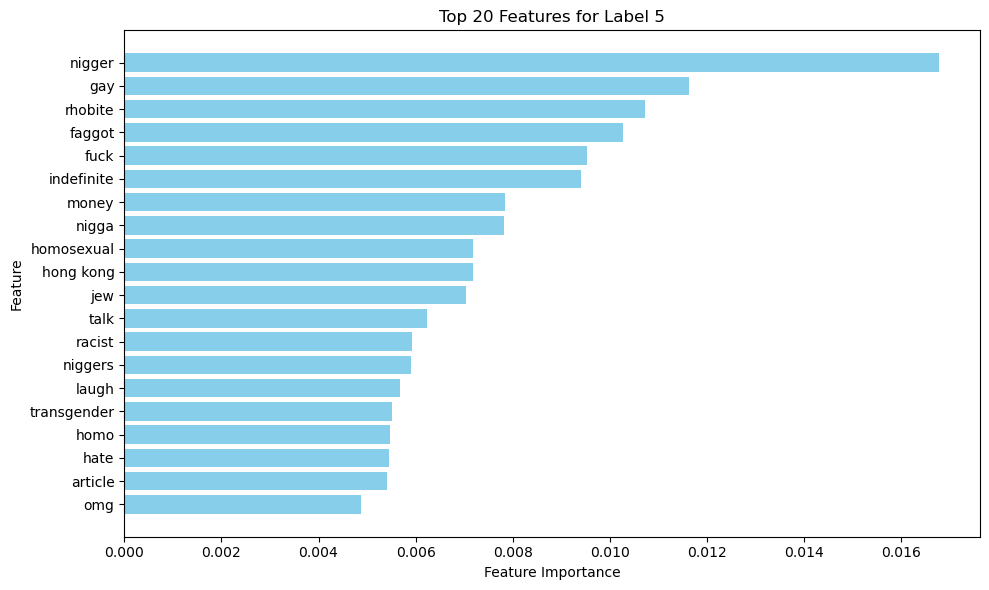

Top Keywords per Label:
Label 0: fuck, suck, shit, thank, list, thanks, idiot, faggot, dick, ass
Label 1: fuck, fucking, st, article, suck, hong kong, nigger, mean say, fuckin, hello hello
Label 2: fuck, suck, bitch, shit, fucking, faggot, asshole, cunt, dick, ass
Label 3: rhobite, kill, die, commit, pathetic, hop, palestinians, arguments, nicely, dont tell
Label 4: fuck, faggot, bitch, suck, asshole, bastard, idiot, article, shit, dick
Label 5: nigger, gay, rhobite, faggot, fuck, indefinite, money, nigga, homosexual, hong kong


In [82]:
# Plot feature importance
plot_feature_importance(best_xgb, tfidf)

# Extract and display top keywords
top_keywords = extract_top_keywords(tfidf, best_xgb)
print("Top Keywords per Label:")
for label, keywords in top_keywords.items():
    print(f"{label}: {', '.join(keywords)}")

# Xgboost with TFIDF Tuning 

In [64]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Binarizer
from xgboost import XGBClassifier
from gensim.downloader import load
from tqdm import tqdm
from skmultilearn.model_selection import IterativeStratification

# Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(
        max_features=20000, stop_words='english', ngram_range=(1, 3), min_df=3, max_df=0.9
    )
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, threshold=0.5):
    model.fit(X_train, y_train)
    y_val_pred_proba = model.predict_proba(X_val)
    y_test_pred_proba = model.predict_proba(X_test)

    # Apply threshold per label for imbalance adjustment
    binarizer = Binarizer(threshold=threshold)
    y_val_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_val_pred_proba]).T)
    y_test_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_test_pred_proba]).T)

    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    val_roc_auc = roc_auc_score(y_val, np.vstack([proba[:, 1] for proba in y_val_pred_proba]).T, average='weighted')
    test_roc_auc = roc_auc_score(y_test, np.vstack([proba[:, 1] for proba in y_test_pred_proba]).T, average='weighted')

    return val_f1, val_roc_auc, test_f1, test_roc_auc







# import numpy as np
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import f1_score, roc_auc_score
# from xgboost import XGBClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import Binarizer
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from gensim.downloader import load
# from tqdm import tqdm

# # Text embeddings
# def generate_tfidf(X_train, X_test):
#     tfidf = TfidfVectorizer(
#         max_features=20000, stop_words='english', ngram_range=(1, 3), min_df=3, max_df=0.9
#     )
#     X_train_tfidf = tfidf.fit_transform(X_train)
#     X_test_tfidf = tfidf.transform(X_test)
#     return X_train_tfidf, X_test_tfidf

# def generate_word2vec(X_train, X_test, model):
#     def get_average_vector(texts):
#         return np.array([
#             np.mean([model[word] for word in text.split() if word in model] or [np.zeros(model.vector_size)], axis=0)
#             for text in texts
#         ])
#     return get_average_vector(X_train), get_average_vector(X_test)

# def generate_glove(X_train, X_test):
#     glove = load('glove-twitter-200')
#     return generate_word2vec(X_train, X_test, glove)

# # Model training and evaluation
# def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, threshold=0.5):
#     model.fit(X_train, y_train)
#     y_val_pred_proba = model.predict_proba(X_val)
#     y_test_pred_proba = model.predict_proba(X_test)

#     # Calibrating probabilities using threshold
#     binarizer = Binarizer(threshold=threshold)
#     y_val_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_val_pred_proba]).T)
#     y_test_pred = binarizer.transform(np.array([proba[:, 1] for proba in y_test_pred_proba]).T)

#     # Metrics
#     val_f1 = f1_score(y_val, y_val_pred, average='weighted')
#     test_f1 = f1_score(y_test, y_test_pred, average='weighted')

#     val_roc_auc = roc_auc_score(y_val, np.vstack([proba[:, 1] for proba in y_val_pred_proba]).T, average='weighted')
#     test_roc_auc = roc_auc_score(y_test, np.vstack([proba[:, 1] for proba in y_test_pred_proba]).T, average='weighted')

#     return val_f1, val_roc_auc, test_f1, test_roc_auc

In [38]:
#  RandomSearch for XGBoost



from scipy.stats import uniform
# Randomized Search for XGBoost
print("Running XGBoost with RandomizedSearchCV...")
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',  
    objective='binary:logistic'
)

param_grid = {
    'estimator__n_estimators': [100, 300],
    'estimator__max_depth': [4, 6],
    'estimator__learning_rate': [0.1, 0.2],
    'estimator__subsample': [0.8],
    'estimator__colsample_bytree': [0.8],
    'estimator__scale_pos_weight': uniform(0.01, 10),
}

random_search = RandomizedSearchCV(
    MultiOutputClassifier(xgb),
    param_grid,
    scoring='f1_weighted',
    cv=IterativeStratification(n_splits=3),
    verbose=2,
    n_jobs=-1,
    n_iter=8
)

# Generate TF-IDF embeddings
X_train_tfidf, X_val_tfidf = generate_tfidf(X_train_split, X_val_split)
_, X_test_tfidf = generate_tfidf(X_train_split, X_test_aligned)

# Fit Random Search
random_search.fit(X_train_tfidf, y_train_split)
print(f"Best Parameters: {random_search.best_params_}")
best_xgb = random_search.best_estimator_

# Evaluate best model
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    best_xgb, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)
print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running XGBoost with RandomizedSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:36:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=3.9884670786542107, estimator__subsample=0.8; total time=13.6min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=3.437603659500009, estimator__subsample=0.8; total time= 6.5min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=3.9884670786542107, estimator__subsample=0.8; total time=13.6min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=3.437603659500009, estimator__subsample=0.8; total time= 6.6min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=300, estim

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:02:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=7.019667751672873, estimator__subsample=0.8; total time= 7.2min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=0.730413253048886, estimator__subsample=0.8; total time= 2.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=0.730413253048886, estimator__subsample=0.8; total time= 2.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=3.437603659500009, estimator__subsample=0.8; total time= 6.6min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=100, estimat

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:03:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:03:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:07:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:08:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=3.9884670786542107, estimator__subsample=0.8; total time=13.8min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=6.494660230456004, estimator__subsample=0.8; total time=14.2min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:09:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:10:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=4, estimator__n_estimators=300, estimator__scale_pos_weight=7.019667751672873, estimator__subsample=0.8; total time= 7.1min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__scale_pos_weight=0.730413253048886, estimator__subsample=0.8; total time= 2.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=5.7714626196106025, estimator__subsample=0.8; total time= 6.0min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=6.494660230456004, estimator__subsample=0.8; total time=14.1min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:10:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:11:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'estimator__colsample_bytree': 0.8, 'estimator__learning_rate': 0.2, 'estimator__max_depth': 6, 'estimator__n_estimators': 300, 'estimator__scale_pos_weight': 3.3334156502610144, 'estimator__subsample': 0.8}


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.2, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=3.3334156502610144, estimator__subsample=0.8; total time=11.3min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__scale_pos_weight=5.7714626196106025, estimator__subsample=0.8; total time= 6.0min
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=300, estimator__scale_pos_weight=6.494660230456004, estimator__subsample=0.8; total time=14.2min


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:13:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:15:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:16:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Validation F1-Weighted: 0.7813928051964928, Validation ROC-AUC: 0.9741710382824074
Test F1-Weighted: 0.6229128405883709, Test ROC-AUC: 0.9603037933854449


In [45]:
# Try other models with the vectorizers above if it will be better

# LightGBM
print("Running LightGBM...")
lgbm_model = MultiOutputClassifier(LGBMClassifier())
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    lgbm_model, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)
print(f"LightGBM Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"LightGBM Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")


Running LightGBM...
[LightGBM] [Info] Number of positive: 13695, number of negative: 115460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.426700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789637
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 18890
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106035 -> initscore=-2.131893
[LightGBM] [Info] Start training from score -2.131893
[LightGBM] [Info] Number of positive: 2158, number of negative: 126997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.623503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789637
[LightGBM] [Info] Number of data points in the train set: 129155, number of used f

In [ ]:
# CatBoost
print("Running CatBoost...")
catboost_model = MultiOutputClassifier(CatBoostClassifier(verbose=0))
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    catboost_model, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)
print(f"CatBoost Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"CatBoost Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running CatBoost...


In [28]:
# XGBoost with Word2Vec
print("Running XGBoost with Word2Vec...")
word2vec_model = load('word2vec-google-news-300')
X_train_word2vec, X_val_word2vec = generate_word2vec(X_train_split, X_val_split, word2vec_model)
_, X_test_word2vec = generate_word2vec(X_train_split, X_test_aligned, word2vec_model)

xgb_word2vec = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    xgb_word2vec, X_train_word2vec, y_train_split, X_val_word2vec, y_val_split, X_test_word2vec, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running XGBoost with Word2Vec...
[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.6% 60.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.8% 112.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.7% 161.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.8% 196.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.0% 233.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.2% 269.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.4% 305.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.5% 341.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.6% 408.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.7% 459.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.4% 521.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.4% 588.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.7% 660.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.7% 726.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.7% 777.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.5% 823.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.1% 882.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.3% 920.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.5% 990.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.1% 1048.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.7% 1109.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.5% 1188.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.7% 1258.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.4% 1320.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.8% 1377.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.3% 1417.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.2% 1482.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.7% 1542.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.9% 1611.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.6% 1639.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.3% 1650.5/1662.8MB downloaded


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:15:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:16:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:16:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:16:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:16:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Validation F1-Weighted: 0.7435246347574908, Validation ROC-AUC: 0.5078953093290284
Test F1-Weighted: 0.5743493071309829, Test ROC-AUC: 0.5014669710140504


In [ ]:
# XGBoost with GloVe
print("Running XGBoost with GloVe...")
X_train_glove, X_val_glove = generate_glove(X_train_split, X_val_split)
_, X_test_glove = generate_glove(X_train_split, X_test_aligned)

xgb_glove = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    xgb_glove, X_train_glove, y_train_split, X_val_glove, y_val_split, X_test_glove, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

# LightGBM

#### LGBM with TFIDF

In [56]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from gensim.downloader import load
from tqdm import tqdm

# Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def generate_word2vec(X_train, X_test, model):
    def get_average_vector(texts):
        return np.array([
            np.mean([model[word] for word in text.split() if word in model] or [np.zeros(model.vector_size)], axis=0)
            for text in texts
        ])
    return get_average_vector(X_train), get_average_vector(X_test)

def generate_glove(X_train, X_test):
    glove = load('glove-twitter-200')
    return generate_word2vec(X_train, X_test, glove)

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    y_val_pred_proba = model.predict_proba(X_val)  # Get probability predictions
    y_test_pred_proba = model.predict_proba(X_test)  # Get probability predictions

    # Reshape probabilities for multi-label ROC AUC calculation
    if y_val_pred_proba is not None:
        y_val_pred_proba = np.transpose(y_val_pred_proba, (1, 0, 2)).reshape(-1, 2)
    if y_test_pred_proba is not None:
        y_test_pred_proba = np.transpose(y_test_pred_proba, (1, 0, 2)).reshape(-1, 2)

    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    val_roc_auc = roc_auc_score(y_val.values.reshape(-1), y_val_pred_proba[:, 1], average='weighted', multi_class='ovr') if y_val_pred_proba is not None else None
    test_roc_auc = roc_auc_score(y_test.values.reshape(-1), y_test_pred_proba[:, 1], average='weighted', multi_class='ovr') if y_test_pred_proba is not None else None

    return val_f1, val_roc_auc, test_f1, test_roc_auc

In [57]:
# LightGBM with TF-IDF
print("Running LightGBM with TF-IDF...")
X_train_tfidf, X_val_tfidf = generate_tfidf(X_train_split, X_val_split)
_, X_test_tfidf = generate_tfidf(X_train_split, X_test_aligned)  # Use the same TF-IDF vectorizer for test data

lgbm_tfidf = MultiOutputClassifier(LGBMClassifier())
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    lgbm_tfidf, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")

Running LightGBM with TF-IDF...
[LightGBM] [Info] Number of positive: 13695, number of negative: 115460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.071346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519293
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 9392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106035 -> initscore=-2.131893
[LightGBM] [Info] Start training from score -2.131893
[LightGBM] [Info] Number of positive: 2158, number of negative: 126997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.231398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519293
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 9392
[LightGBM] [Info] [binary:BoostFromScor

In [60]:
# lIGHTGBM WITH tfdif metrics
print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Validation ROC-AUC: {test_roc_auc}")

Validation F1-Weighted: 0.7506806835421655, Validation ROC-AUC: 0.9830877998839951
Test F1-Weighted: 0.6353623068299777, Validation ROC-AUC: 0.9718684773830152


# TUNING LGBM with TFIDF

In [100]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for LightGBM
param_grid = {
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [10],
    'estimator__num_leaves': [50, 70],
    'estimator__feature_fraction': [0.9, 1.0],
    'estimator__bagging_fraction': [0.9],
    'estimator__lambda_l1': [0, 0.1],
    'estimator__lambda_l2': [0, 0.1],
}

# MultiOutputClassifier requires a base estimator
base_lgbm = LGBMClassifier(random_state=42, early_stopping_rounds=10) 

# Wrap the model in MultiOutputClassifier to get the multilable
multioutput_lgbm = MultiOutputClassifier(base_lgbm)

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    multioutput_lgbm,
    param_distributions=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=3,
    n_jobs=-1,
    n_iter=50  
)


# Fit the model on the training data
random_search.fit(X_train_tfidf, y_train_split)

# Best parameters and results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Validation F1 Score: {best_score}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_frac

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value:

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/multioutput.py", line 450, in fit
    super().fit(X, Y, sample_weight, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/multioutput.py", line 216, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.10/site-packages/joblib/_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "/opt/conda/lib/python3.10/site-packages/joblib/_parallel_backends.py", line 597, in __init__
    self.results = batch()
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/multioutput.py", line 49, in _fit_estimator
    estimator.fit(X, y, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 1284, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 955, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py", line 317, in train
    cb(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/callback.py", line 399, in __call__
    self._init(env)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/callback.py", line 324, in _init
    raise ValueError("For early stopping, at least one dataset and eval metric is required for evaluation")
ValueError: For early stopping, at least one dataset and eval metric is required for evaluation


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value:

### LBGBM with other vectorization methods

In [62]:
# LightGBM with Word2Vec
print("Running LightGBM with Word2Vec...")
word2vec_model = load('word2vec-google-news-300')
X_train_word2vec, X_val_word2vec = generate_word2vec(X_train_split, X_val_split, word2vec_model)
_, X_test_word2vec = generate_word2vec(X_train_split, X_test_aligned, word2vec_model)

lgbm_word2vec = MultiOutputClassifier(LGBMClassifier())
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    lgbm_word2vec, X_train_word2vec, y_train_split, X_val_word2vec, y_val_split, X_test_word2vec, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running LightGBM with Word2Vec...
[LightGBM] [Info] Number of positive: 13695, number of negative: 115460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106035 -> initscore=-2.131893
[LightGBM] [Info] Start training from score -2.131893
[LightGBM] [Info] Number of positive: 2158, number of negative: 126997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016709 -> initscore=-4.074982
[LightGBM] [Info] Start t

In [63]:
# LightGBM with GloVe
print("Running LightGBM with GloVe...")
X_train_glove, X_val_glove = generate_glove(X_train_split, X_val_split)
_, X_test_glove = generate_glove(X_train_split, X_test_aligned)

lgbm_glove = MultiOutputClassifier(LGBMClassifier())
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    lgbm_glove, X_train_glove, y_train_split, X_val_glove, y_val_split, X_test_glove, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running LightGBM with GloVe...
[LightGBM] [Info] Number of positive: 13695, number of negative: 115460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106035 -> initscore=-2.131893
[LightGBM] [Info] Start training from score -2.131893
[LightGBM] [Info] Number of positive: 2158, number of negative: 126997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 129155, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016709 -> initscore=-4.074982
[LightGBM] [Info] Start trai

# Sgdclassifier Model Variants

In [70]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from gensim.downloader import load
from tqdm import tqdm

# 1. Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def generate_word2vec(X_train, X_test, model):
    def get_average_vector(texts):
        return np.array([
            np.mean([model[word] for word in text.split() if word in model] or [np.zeros(model.vector_size)], axis=0)
            for text in texts
        ])
    return get_average_vector(X_train), get_average_vector(X_test)

def generate_glove(X_train, X_test):
    glove = load('glove-twitter-200')
    return generate_word2vec(X_train, X_test, glove)

# import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from gensim.downloader import load
from tqdm import tqdm

# Text embeddings
def generate_tfidf(X_train, X_test):
    tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def generate_word2vec(X_train, X_test, model):
    def get_average_vector(texts):
        return np.array([
            np.mean([model[word] for word in text.split() if word in model] or [np.zeros(model.vector_size)], axis=0)
            for text in texts
        ])
    return get_average_vector(X_train), get_average_vector(X_test)

def generate_glove(X_train, X_test):
    glove = load('glove-twitter-200')
    return generate_word2vec(X_train, X_test, glove)

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict class labels
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Predict probabilities for ROC-AUC calculation
    y_val_proba = np.array([clf.predict_proba(X_val)[:, 1] for clf in model.estimators_]).T
    y_test_proba = np.array([clf.predict_proba(X_test)[:, 1] for clf in model.estimators_]).T
    
    # Calculate weighted F1 scores
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Calculate ROC-AUC scores
    val_roc_auc = roc_auc_score(y_val, y_val_proba, average='weighted', multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test, y_test_proba, average='weighted', multi_class='ovr')
    
    return val_f1, val_roc_auc, test_f1, test_roc_auc

In [71]:
print("Running SGDClassifier with TF-IDF...")
X_train_tfidf, X_val_tfidf = generate_tfidf(X_train_split, X_val_split)
_, X_test_tfidf = generate_tfidf(X_train_split, X_test_aligned)

sgd_tfidf = MultiOutputClassifier(SGDClassifier(loss='log_loss', random_state=42))
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    sgd_tfidf, X_train_tfidf, y_train_split, X_val_tfidf, y_val_split, X_test_tfidf, y_test_aligned
)

print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running SGDClassifier with TF-IDF...
Validation F1-Weighted: 0.5124537755012297, Validation ROC-AUC: 0.970781869970259
Test F1-Weighted: 0.48129405529353814, Test ROC-AUC: 0.9583321386961534


In [72]:
# SGDClassifier with Word2Vec
print("Running SGDClassifier with Word2Vec...")

# Load the pre-trained Word2Vec model
word2vec_model = load('word2vec-google-news-300')

# Generate Word2Vec embeddings for training, validation, and test datasets
X_train_word2vec, X_val_word2vec = generate_word2vec(X_train_split, X_val_split, word2vec_model)
_, X_test_word2vec = generate_word2vec(X_train_split, X_test_aligned, word2vec_model)

# Initialize the SGDClassifier wrapped with MultiOutputClassifier
sgd_word2vec = MultiOutputClassifier(SGDClassifier(loss='log_loss', random_state=42))

# Evaluate the model
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    sgd_word2vec, X_train_word2vec, y_train_split, X_val_word2vec, y_val_split, X_test_word2vec, y_test_aligned
)

# Print results
print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running SGDClassifier with Word2Vec...
Validation F1-Weighted: 0.5561361481265709, Validation ROC-AUC: 0.9615960422374489
Test F1-Weighted: 0.514885735184124, Test ROC-AUC: 0.9405488721637126


In [73]:
# SGDClassifier with GloVe
print("Running SGDClassifier with GloVe...")

# Generate GloVe embeddings for training, validation, and test datasets
X_train_glove, X_val_glove = generate_glove(X_train_split, X_val_split)
_, X_test_glove = generate_glove(X_train_split, X_test_aligned)

# Initialize the SGDClassifier wrapped with MultiOutputClassifier
sgd_glove = MultiOutputClassifier(SGDClassifier(loss='log_loss', random_state=42))

# Evaluate the model
val_f1, val_roc_auc, test_f1, test_roc_auc = evaluate_model(
    sgd_glove, X_train_glove, y_train_split, X_val_glove, y_val_split, X_test_glove, y_test_aligned
)

# Print results
print(f"Validation F1-Weighted: {val_f1}, Validation ROC-AUC: {val_roc_auc}")
print(f"Test F1-Weighted: {test_f1}, Test ROC-AUC: {test_roc_auc}")

Running SGDClassifier with GloVe...
Validation F1-Weighted: 0.47294136139030896, Validation ROC-AUC: 0.940577759390223
Test F1-Weighted: 0.455967490465916, Test ROC-AUC: 0.9120473587166542


# Summary

In [98]:
# Create a DataFrame summarizing the results
data = [
    ["XGBoost", "TF-IDF", 0.7351, 0.5093, 0.6252, 0.4992],
    ["Tuned XGBoost", "TF-IDF", 0.7814, 0.9742, 0.6229, 0.9603],
    ["LightGBM", "TF-IDF", 0.7507, 0.9831, 0.6354, 0.9719],
    ["LightGBM", "Word2Vec", 0.7090, 0.9785, 0.5686, 0.9586],
    ["LightGBM", "GloVe", 0.6439, 0.9682, 0.5219, 0.9442],
    ["SGDClassifier", "TF-IDF", 0.5125, 0.9708, 0.4813, 0.9583],
    ["SGDClassifier", "Word2Vec", 0.5561, 0.9616, 0.5149, 0.9405],
    ["SGDClassifier", "GloVe", 0.4729, 0.9406, 0.4560, 0.9120],
]

# Create a DataFrame
results_df = pd.DataFrame(data, columns=[
    "Model", "Vectorization", "Validation F1-Weighted", "Validation ROC-AUC", 
    "Test F1-Weighted", "Test ROC-AUC"
])

# Display the DataFrame
print(results_df)


           Model Vectorization  Validation F1-Weighted  Validation ROC-AUC  \
0        XGBoost        TF-IDF                  0.7351              0.5093   
1  Tuned XGBoost        TF-IDF                  0.7814              0.9742   
2       LightGBM        TF-IDF                  0.7507              0.9831   
3       LightGBM      Word2Vec                  0.7090              0.9785   
4       LightGBM         GloVe                  0.6439              0.9682   
5  SGDClassifier        TF-IDF                  0.5125              0.9708   
6  SGDClassifier      Word2Vec                  0.5561              0.9616   
7  SGDClassifier         GloVe                  0.4729              0.9406   

   Test F1-Weighted  Test ROC-AUC  
0            0.6252        0.4992  
1            0.6229        0.9603  
2            0.6354        0.9719  
3            0.5686        0.9586  
4            0.5219        0.9442  
5            0.4813        0.9583  
6            0.5149        0.9405  
7        

In [99]:
# Create a DataFrame summarizing the results with F1 scores and ROC-AUC scores side by side
data = [
    ["XGBoost", "TF-IDF", 0.7351, 0.6252, 0.5093, 0.4992],
    ["Tuned XGBoost", "TF-IDF", 0.7814, 0.6229, 0.9742, 0.9603],
    ["LightGBM", "TF-IDF", 0.7507, 0.6354, 0.9831, 0.9719],
    ["LightGBM", "Word2Vec", 0.7090, 0.5686, 0.9785, 0.9586],
    ["LightGBM", "GloVe", 0.6439, 0.5219, 0.9682, 0.9442],
    ["SGDClassifier", "TF-IDF", 0.5125, 0.4813, 0.9708, 0.9583],
    ["SGDClassifier", "Word2Vec", 0.5561, 0.5149, 0.9616, 0.9405],
    ["SGDClassifier", "GloVe", 0.4729, 0.4560, 0.9406, 0.9120],
]

# Create a DataFrame
results_df = pd.DataFrame(data, columns=[
    "Model", "Vectorization", 
    "Validation F1-Weighted", "Test F1-Weighted", 
    "Validation ROC-AUC", "Test ROC-AUC"
])

# Display the DataFrame
print(results_df)


           Model Vectorization  Validation F1-Weighted  Test F1-Weighted  \
0        XGBoost        TF-IDF                  0.7351            0.6252   
1  Tuned XGBoost        TF-IDF                  0.7814            0.6229   
2       LightGBM        TF-IDF                  0.7507            0.6354   
3       LightGBM      Word2Vec                  0.7090            0.5686   
4       LightGBM         GloVe                  0.6439            0.5219   
5  SGDClassifier        TF-IDF                  0.5125            0.4813   
6  SGDClassifier      Word2Vec                  0.5561            0.5149   
7  SGDClassifier         GloVe                  0.4729            0.4560   

   Validation ROC-AUC  Test ROC-AUC  
0              0.5093        0.4992  
1              0.9742        0.9603  
2              0.9831        0.9719  
3              0.9785        0.9586  
4              0.9682        0.9442  
5              0.9708        0.9583  
6              0.9616        0.9405  
7          